<div style="text-align: center;">
    <h1> <font style="bold"> Trabajo Práctico Final </font></h1>
    <h2><font style="bold">Especialización en Inteligencia Artificial</font></h2>
    <h2><font style="bold">Probabilidad y Estadistica</font></h2>
    <h3><font style="bold">Abril Noguera - Carlos Rodríguez - José Roberto Castro Delgado</font></h3>
</div>

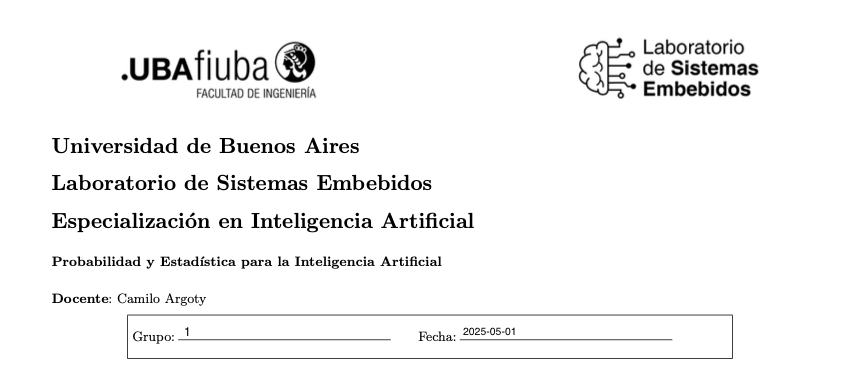

In [124]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import t as t_dist  # Utilizamos solo para comparar el p-valor y el valor crítico
from scipy.stats import gaussian_kde
import statsmodels.api as sm
from matplotlib.cm import get_cmap
from statsmodels.distributions.empirical_distribution import ECDF

In [125]:
# Cargamos las dos hojas como DataFrames
df_santa_ana = pd.read_excel('Datos.xlsx', sheet_name='Santa Ana')
df_santa_ana['Tienda'] = 'Santa Ana'
df_la_floresta = pd.read_excel('Datos.xlsx', sheet_name='La Floresta')
df_la_floresta['Tienda'] = 'La Floresta'

df = pd.concat([df_santa_ana, df_la_floresta], ignore_index=True)

In [126]:
# Procesamiento de la variable 'Fecha'
df['Fecha'] = pd.to_datetime(df['Fecha'])

df['Mes'] = df['Fecha'].dt.month
df['Dia'] = df['Fecha'].dt.weekday
df['DiaSemana'] = df['Fecha'].dt.dayofweek
dias = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
df['DiaNombre'] = df['DiaSemana'].map(dias)

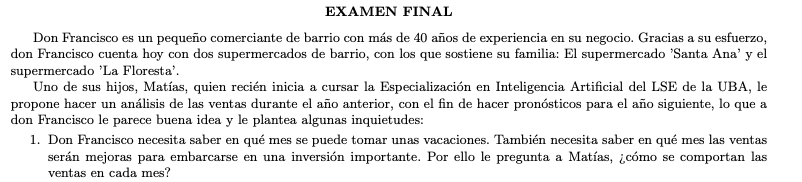

In [127]:
# Agrupamos por Mes y Tienda, sumando ventas
tabla_ventas = df.groupby(['Mes', 'Tienda'])['Ventas'].sum().unstack()

# Agregamos la columna 'Total' sumando Santa Ana + La Floresta
tabla_ventas['Total'] = tabla_ventas.sum(axis=1)

# Mostramos la tabla final
print(tabla_ventas)

Tienda  La Floresta  Santa Ana      Total
Mes                                      
1         564909.44  531254.37 1096163.81
2         555204.34  537654.75 1092859.09
3         716058.88  669986.03 1386044.91
4         629416.39  599332.09 1228748.47
5         657326.06  656018.80 1313344.86
6         697688.75  672495.24 1370184.00
7         693765.39  641277.32 1335042.71
8         734056.19  704267.47 1438323.66
9         707686.65  671577.42 1379264.07
10        723666.50  675875.98 1399542.48
11        684028.85  669108.98 1353137.84
12        662742.55  609789.19 1272531.74


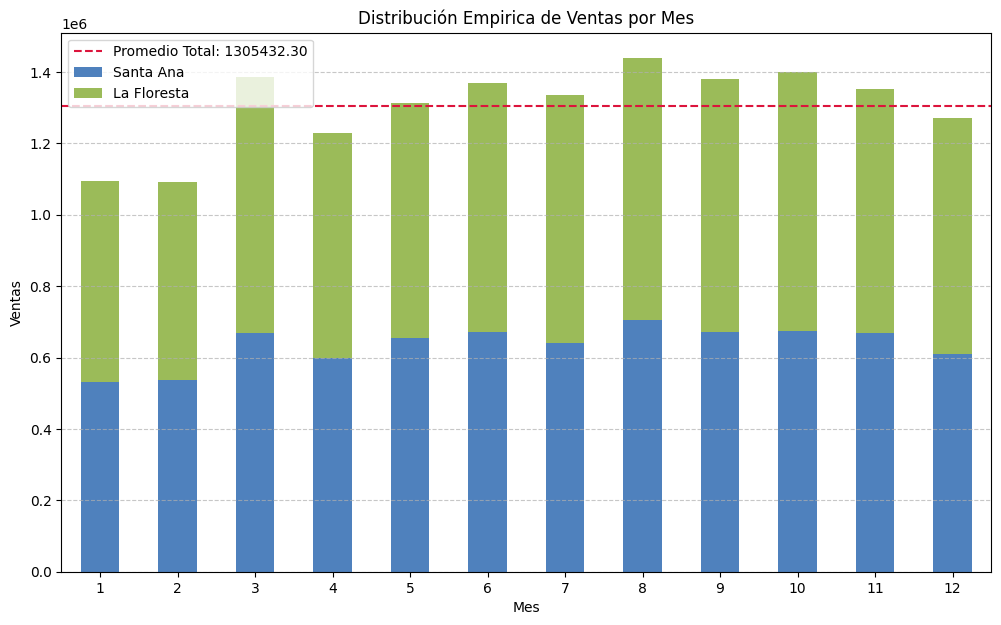

In [128]:
# Graficamos la tabla de ventas
colores = ['#4F81BD', '#9BBB59']

tabla_ventas[['Santa Ana', 'La Floresta']].plot(
    kind='bar',
    stacked=True,
    figsize=(12,7),
    color=colores
)

# Agregamos la línea de promedio
promedio_total = tabla_ventas['Total'].mean()
plt.axhline(y=promedio_total, color='crimson', linestyle='--', label=f'Promedio Total: {promedio_total:.2f}')

# Mejoramos el gráfico
plt.title("Distribución Empirica de Ventas por Mes")
plt.xlabel("Mes")
plt.ylabel("Ventas")
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostramos
plt.show()

A partir del análisis de las ventas mensuales, se observó que los **meses de menores ventas** fueron **enero** y **febrero**, con ventas totales aproximadas de **1.096.164 dólares** y **1.092.859 dólares** respectivamente, valores muy similares y claramente por debajo del promedio anual de **1.305.432 dólares**.

Por otro lado, se identificaron dos momentos de **ventas máximas**: el primero en **marzo**, con aproximadamente **1.386.045 dólares** en ventas, y el segundo, aún más elevado, en **agosto**, alcanzando un total de **1.438.324 dólares**.

En base a estos resultados, se recomienda a Don Francisco considerar **enero o febrero** como los meses más adecuados para tomar vacaciones, dado que representan los períodos de menor actividad comercial. Asimismo, **marzo** y especialmente **agosto** surgen como los momentos más convenientes para **realizar inversiones importantes**, coincidiendo con los meses de mayores ingresos.

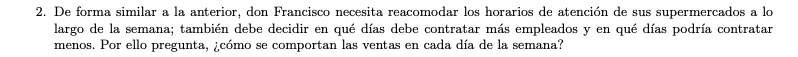

In [129]:
# Agrupamos ventas por tienda y día de la semana
ventas_por_dia_tienda = df.groupby(['DiaNombre', 'Tienda'])['Ventas'].sum().unstack()

# Ordenamos los días correctamente
ventas_por_dia_tienda = ventas_por_dia_tienda.reindex(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])

# Agregamos la columna 'Total' sumando Santa Ana + La Floresta
ventas_por_dia_tienda['Total'] = ventas_por_dia_tienda.sum(axis=1)

# Mostramos la tabla final
print(ventas_por_dia_tienda)

Tienda     La Floresta  Santa Ana      Total
DiaNombre                                   
Lunes       1055371.95 1016699.45 2072071.41
Martes      1194650.76 1123419.36 2318070.12
Miércoles   1245788.47 1184512.79 2430301.26
Jueves      1277271.96 1193247.66 2470519.62
Viernes     1205588.98 1128702.98 2334291.96
Sábado      1068010.34 1051578.81 2119589.15
Domingo      979867.53  940476.59 1920344.12


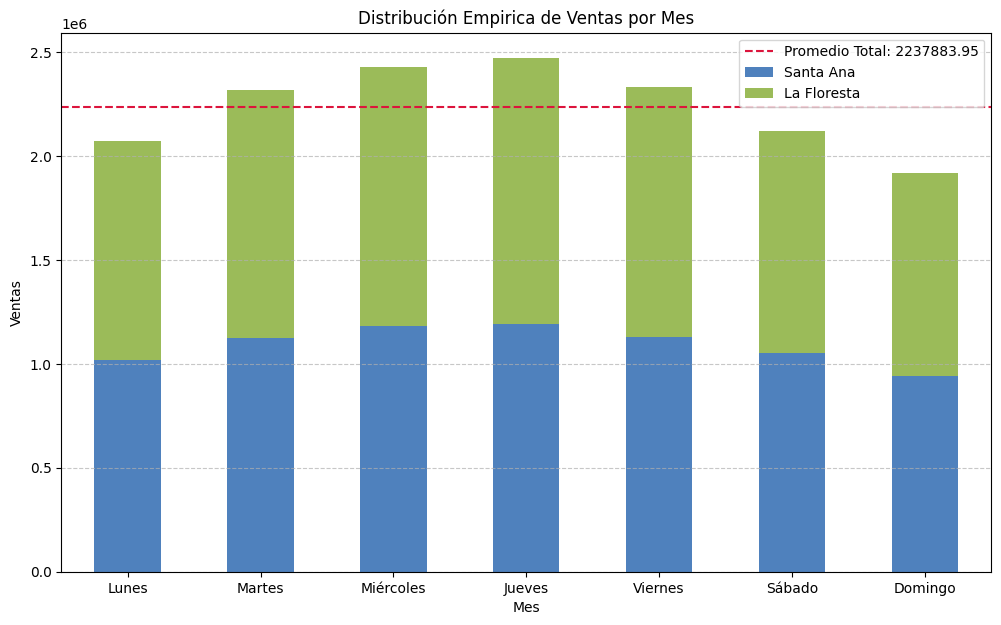

In [130]:
# Gráfico de comparación
ventas_por_dia_tienda[['Santa Ana', 'La Floresta']].plot(
    kind='bar',
    stacked=True,
    figsize=(12,7),
    color=colores
)

# Agregamos la línea de promedio
promedio_total = ventas_por_dia_tienda['Total'].mean()
plt.axhline(y=promedio_total, color='crimson', linestyle='--', label=f'Promedio Total: {promedio_total:.2f}')

# Mejoramos el gráfico
plt.title("Distribución Empirica de Ventas por Mes")
plt.xlabel("Mes")
plt.ylabel("Ventas")
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostramos
plt.show()

Del análisis surge que el **miércoles** y el **jueves** son los días de **mayor volumen de ventas**, con valores superiores al promedio semanal de aproximadamente **2.237.884 dólares**. Estos días presentan una demanda más alta, por lo que se recomienda reforzar el personal para asegurar un buen nivel de atención al cliente.

En contraste, el **domingo** resulta ser el día de **menor volumen de ventas**, seguido por el **lunes** y el **sábado**. Estos días presentan valores de venta considerablemente más bajos en comparación con el resto de la semana. Por lo tanto, Don Francisco podría considerar reducir el personal durante domingos y lunes para optimizar los costos operativos.

En general, se observa que la actividad comercial se intensifica hacia mediados de semana, con un descenso hacia el fin de semana, lo que sugiere que la planificación de horarios y la asignación de recursos humanos debe estar alineada con este patrón de comportamiento.

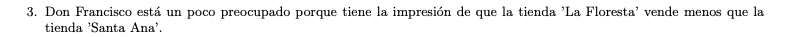

In [131]:
# Agrupamos ventas totales por Tienda
ventas_por_tienda = df.groupby('Tienda')['Ventas'].sum()

# Ventas de cada tienda
ventas_santa_ana = ventas_por_tienda['Santa Ana']
ventas_la_floresta = ventas_por_tienda['La Floresta']

# Calculamos la diferencia absoluta y relativa
diferencia = ventas_la_floresta - ventas_santa_ana
porcentaje_diferencia = (diferencia / ventas_santa_ana) * 100

print(f"Ventas Santa Ana: {ventas_santa_ana:.2f}")
print(f"Ventas La Floresta: {ventas_la_floresta:.2f}")
print(f"Diferencia absoluta: {diferencia:.2f}")
print(f"Diferencia relativa: {porcentaje_diferencia:.2f}% respecto a Santa Ana")

Ventas Santa Ana: 7638637.64
Ventas La Floresta: 8026550.00
Diferencia absoluta: 387912.36
Diferencia relativa: 5.08% respecto a Santa Ana


La impresión de Don Francisco no se confirma. Lejos de vender menos, la tienda "La Floresta" ha logrado superar las ventas de "Santa Ana" en aproximadamente un 5%. Si bien la diferencia no es extremadamente significativa, muestra que "La Floresta" se mantiene competitiva e incluso supera ligeramente a "Santa Ana" en desempeño comercial.

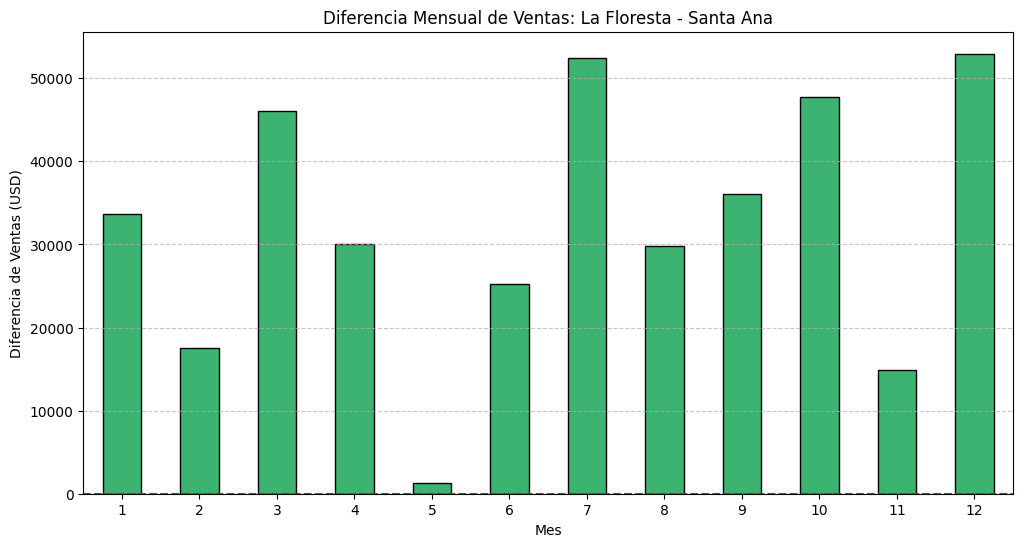

In [132]:
# Calculamos la diferencia: La Floresta - Santa Ana
diferencia_mensual = tabla_ventas['La Floresta'] - tabla_ventas['Santa Ana']

# Graficamos
plt.figure(figsize=(12,6))
diferencia_mensual.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.axhline(0, color='crimson', linestyle='--')
plt.title("Diferencia Mensual de Ventas: La Floresta - Santa Ana")
plt.xlabel("Mes")
plt.ylabel("Diferencia de Ventas (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

- **En todos los meses del año**, las diferencias son **positivas**, lo que significa que **La Floresta vendió más que Santa Ana** a lo largo de todo el período.
- La diferencia de ventas varía de mes a mes, con algunos meses mostrando una diferencia superior a **50.000 dólares**.
- En el mes de **mayo**, la diferencia es mínima pero aún favorable a La Floresta.

La percepción de Don Francisco resulta incorrecta no solo a nivel anual, sino también al observar el comportamiento mes a mes: **La Floresta ha mantenido una ventaja constante sobre Santa Ana durante todo el año**. Esta consistencia en el desempeño comercial refuerza la solidez de "La Floresta" como tienda y sugiere que las estrategias actuales están siendo efectivas.

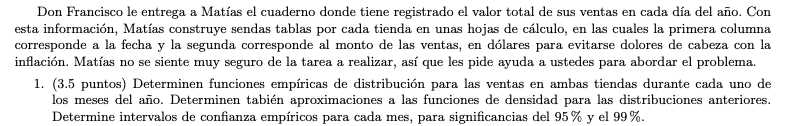

In [133]:
df_santa_ana['Fecha'] = pd.to_datetime(df_santa_ana['Fecha'])
df_la_floresta['Fecha'] = pd.to_datetime(df_la_floresta['Fecha'])

df_santa_ana['Mes'] = df_santa_ana['Fecha'].dt.month
df_la_floresta['Mes'] = df_la_floresta['Fecha'].dt.month

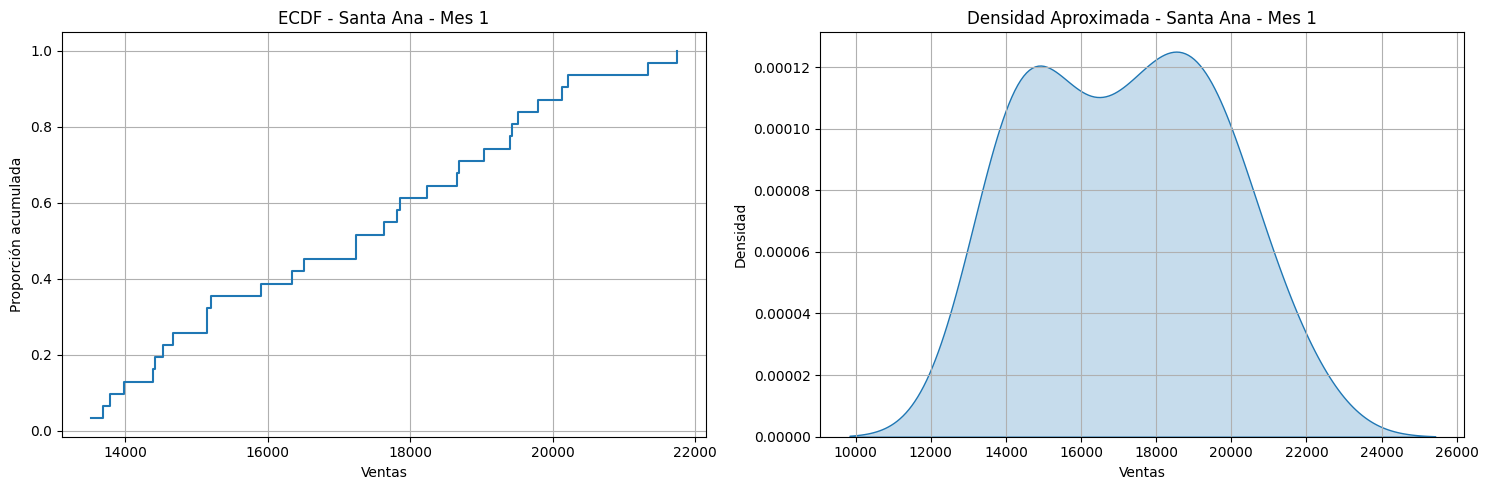

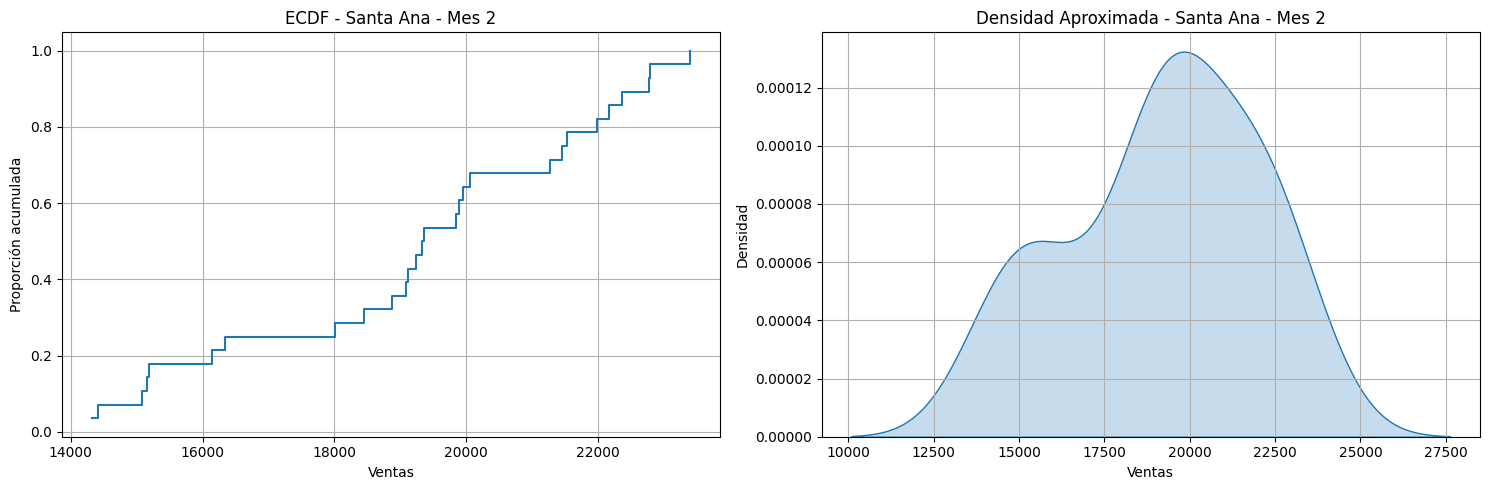

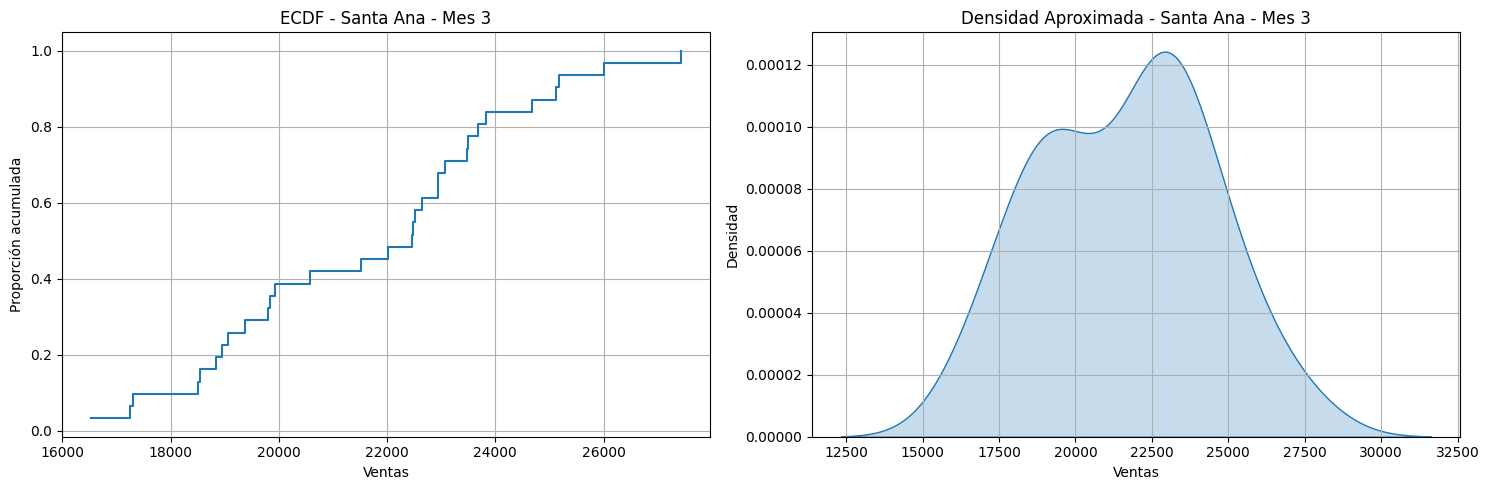

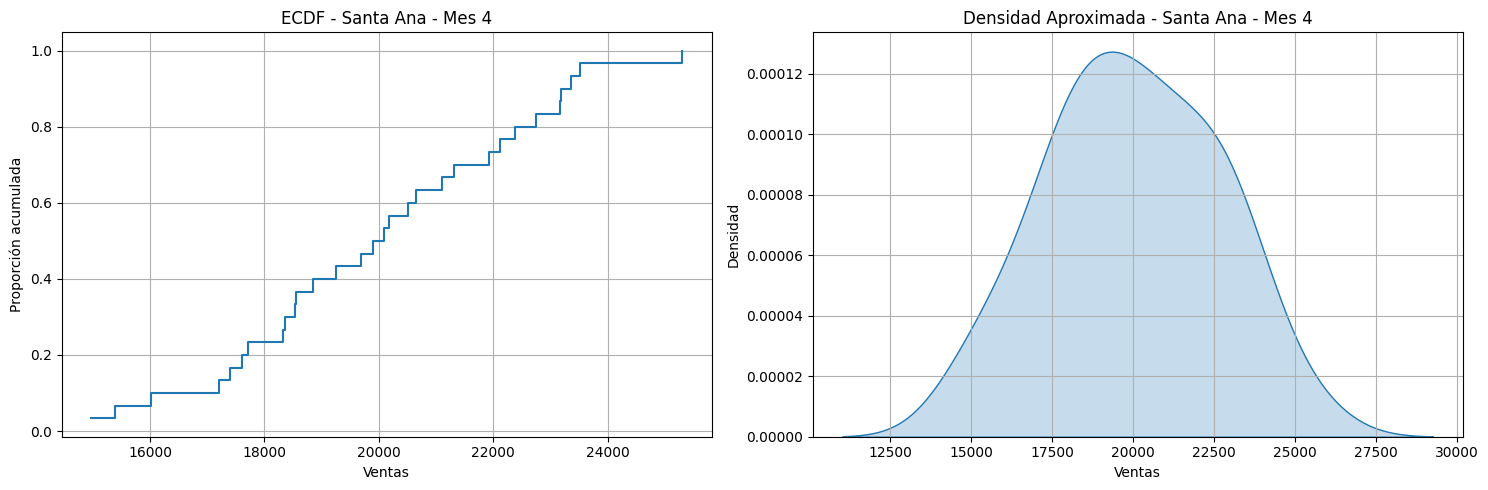

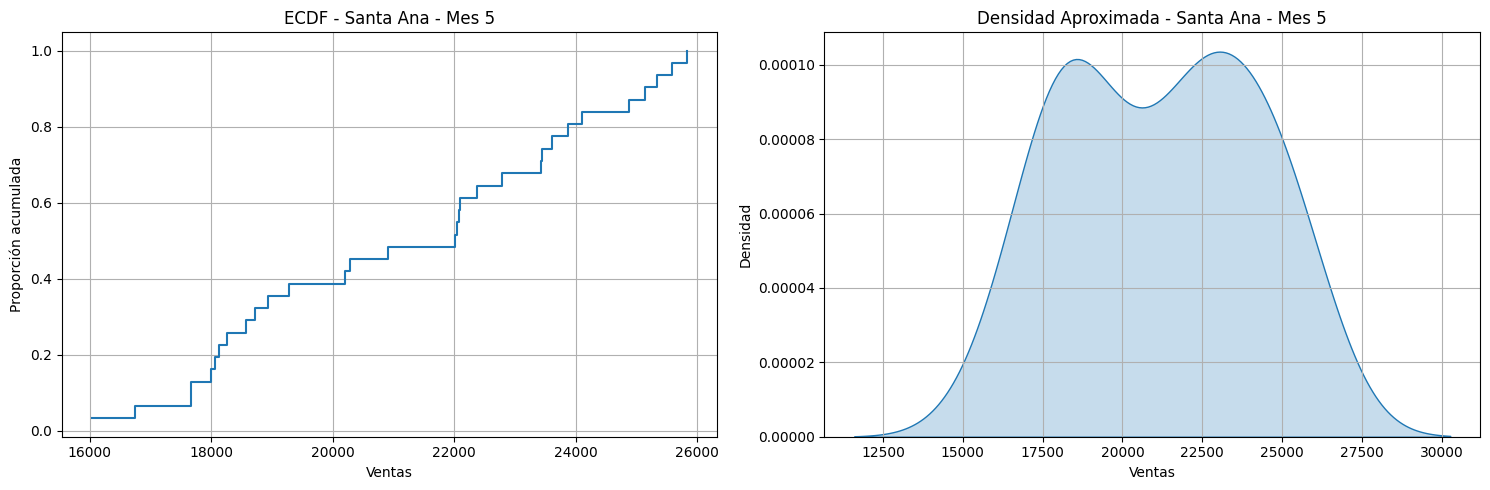

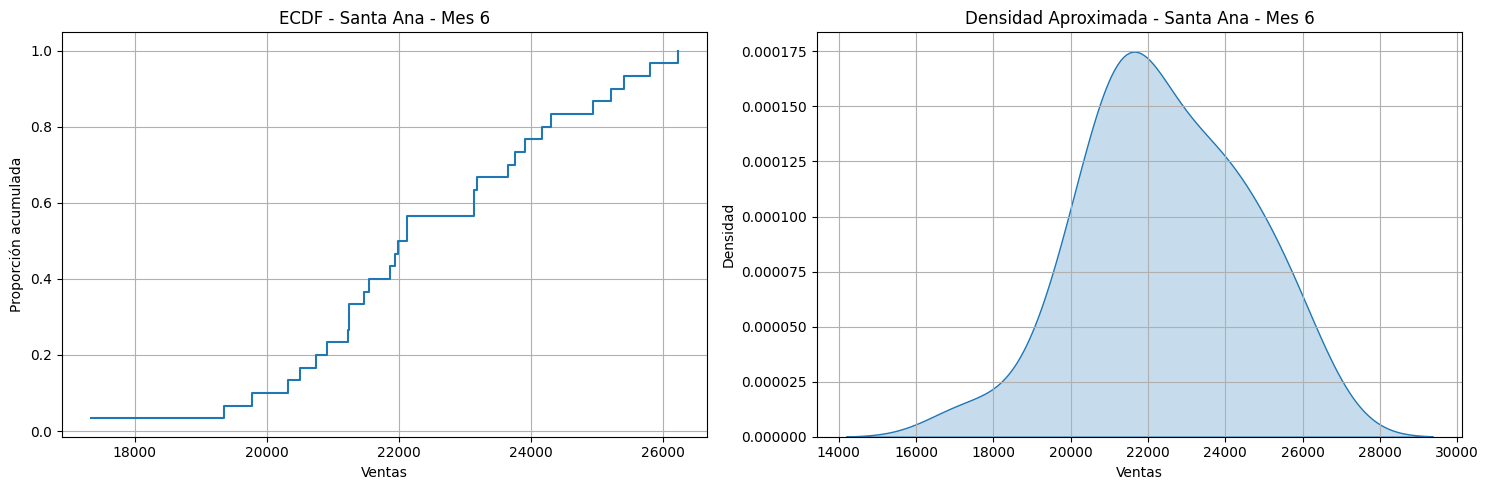

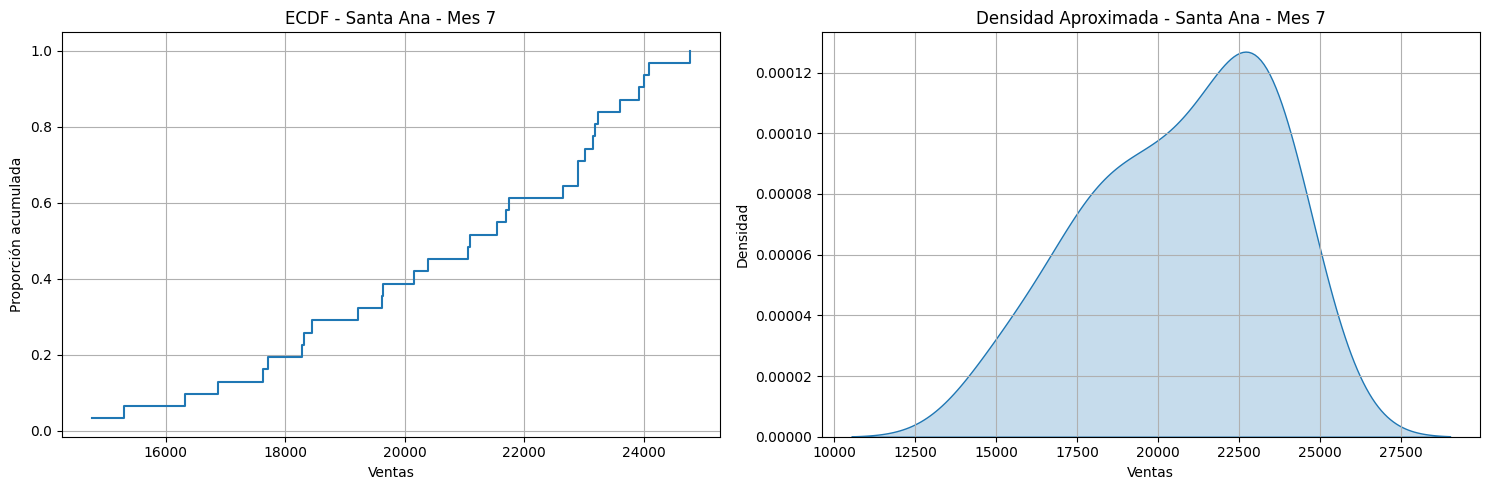

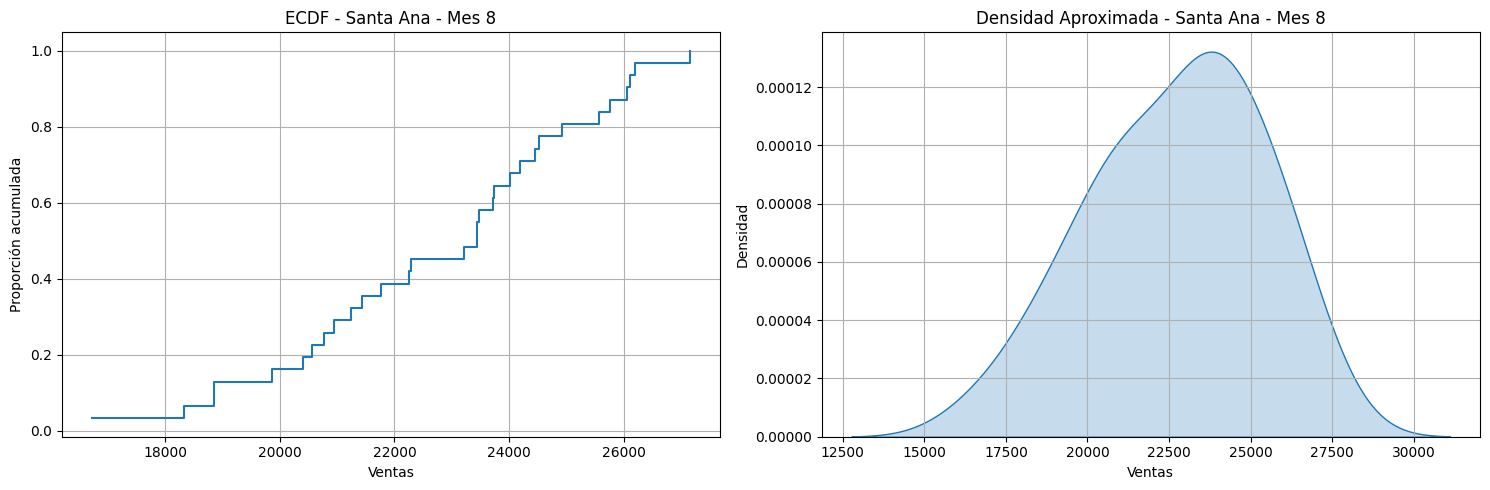

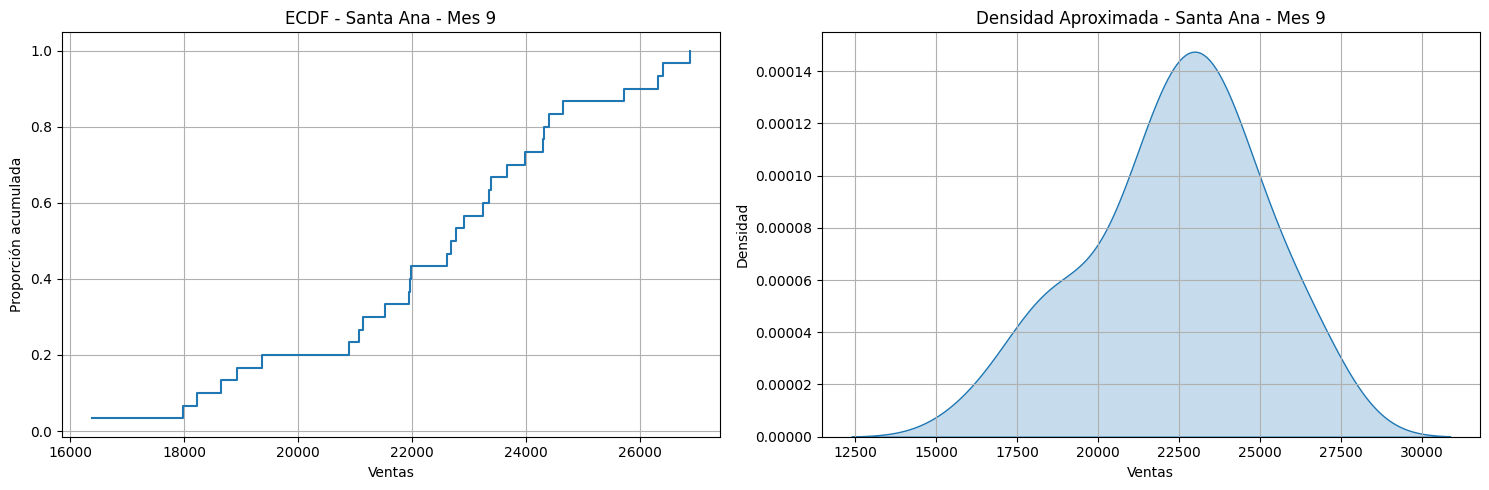

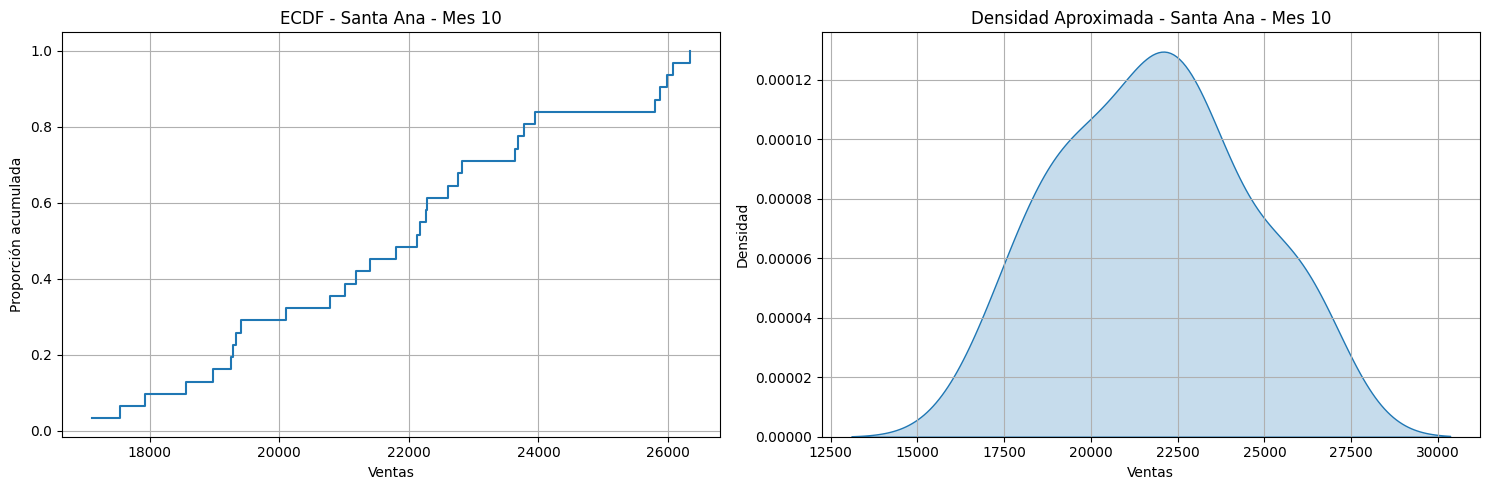

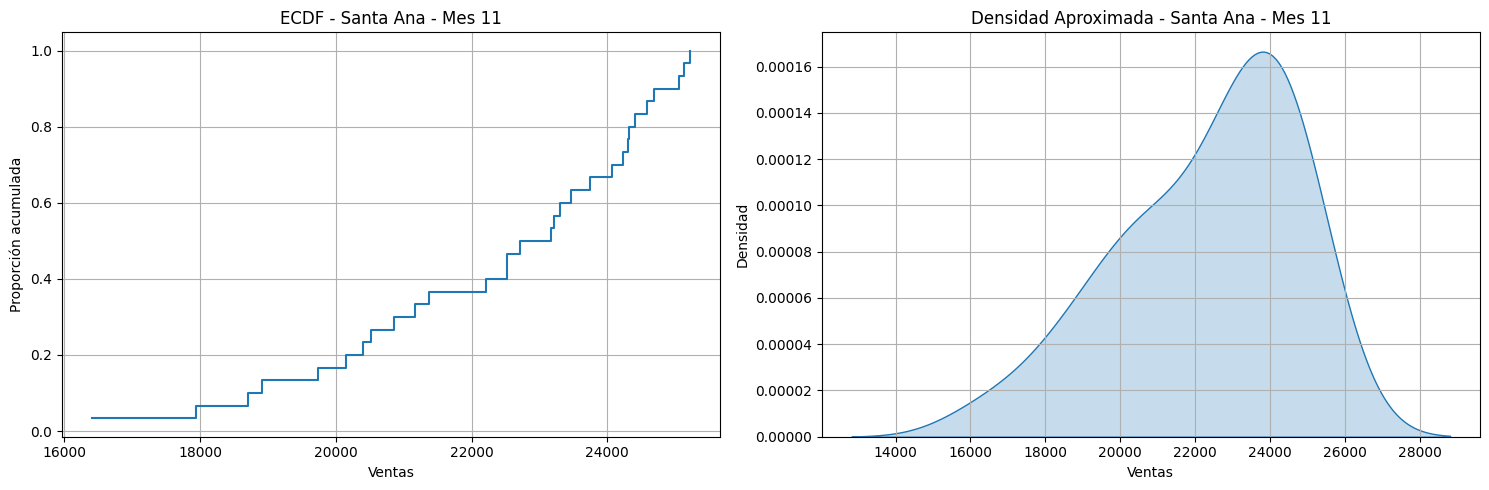

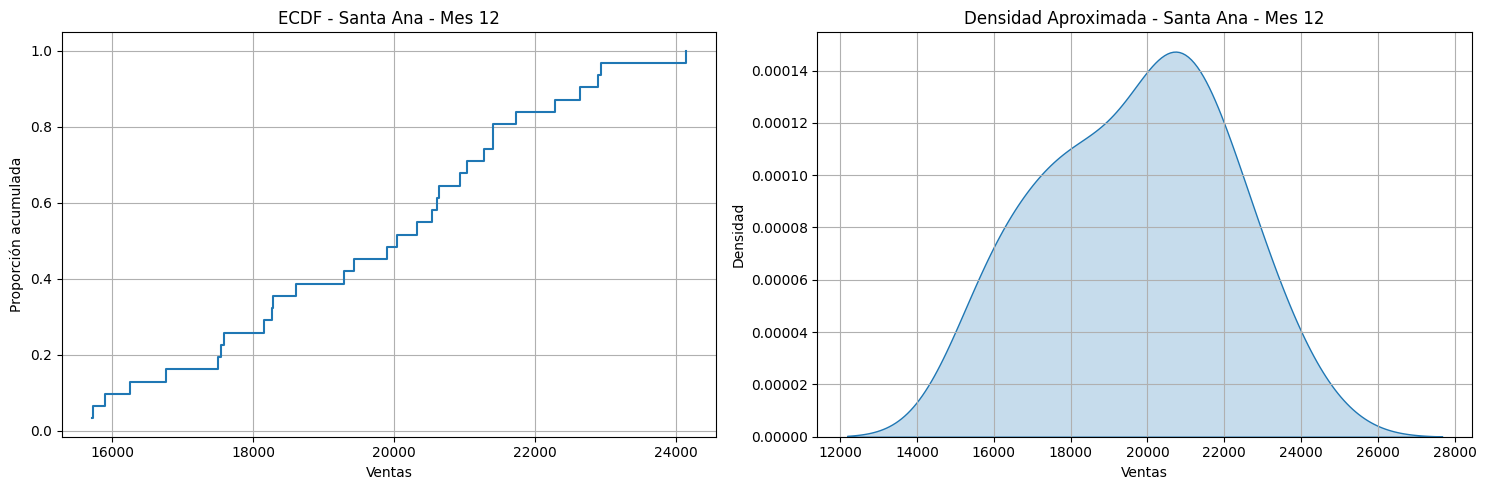

In [134]:
meses_santa = sorted(df_santa_ana['Mes'].unique())

for mes in meses_santa:
    datos = df_santa_ana[df_santa_ana['Mes'] == mes]['Ventas']
    x = np.sort(datos)
    y = np.arange(1, len(x)+1) / len(x)
    
    # ECDF
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.step(x, y, where='post')
    plt.title(f'ECDF - Santa Ana - Mes {mes}')
    plt.xlabel('Ventas')
    plt.ylabel('Proporción acumulada')
    plt.grid(True)
    
    # Aproximacion de Densidad
    plt.subplot(1, 2, 2)
    sns.kdeplot(datos, fill=True)
    plt.title(f'Densidad Aproximada - Santa Ana - Mes {mes}')
    plt.xlabel('Ventas')
    plt.ylabel('Densidad')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


In [135]:
# Función para calcular ICE por percentiles interpolados
def calcular_ice_por_mes(df, tienda, niveles=[0.95, 0.99]):
    df_tienda = df[df['Tienda'] == tienda]
    meses = sorted(df_tienda['Mes'].unique())
    filas = []

    for mes in meses:
        datos = df_tienda[df_tienda['Mes'] == mes]['Ventas'].values
        fila = {'Mes': mes}
        for nivel in niveles:
            alpha = 1 - nivel
            low = np.percentile(datos, alpha/2 * 100)
            high = np.percentile(datos, (1 - alpha/2) * 100)
            fila[f'ICE {int(nivel*100)}% Inferior'] = round(low, 2)
            fila[f'ICE {int(nivel*100)}% Superior'] = round(high, 2)
        filas.append(fila)

    return pd.DataFrame(filas)

In [136]:
ice_santa_ana = calcular_ice_por_mes(df, 'Santa Ana')

ice_santa_ana.head(12)

,Mes,ICE 95% Inferior,ICE 95% Superior,ICE 99% Inferior,ICE 99% Superior
0,1,13653.85,21434.47,13549.19,21678.99
1,2,14383.19,22992.73,14330.75,23322.30
2,3,17071.89,26362.61,16642.87,27214.67
3,4,15279.72,24010.04,15035.83,25040.75
4,5,16563.84,25641.64,16138.03,25797.73
5,6,18798.67,25914.80,17632.40,26154.52
6,7,15168.10,24260.96,14845.11,24673.60
7,8,17934.11,26440.91,16963.87,27016.54
8,9,17540.83,26536.10,16613.04,26810.50
9,10,17434.17,26147.36,17173.08,26304.81


In [137]:
def graficar_ice(df_ice, tienda, t='Mes'):
    # Extraer eje x
    eje_x = df_ice[t]

    # Si son días de la semana, aseguramos el orden correcto
    if t.lower().startswith('dia'):
        dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        df_ice[t] = pd.Categorical(df_ice[t], categories=dias_orden, ordered=True)
        df_ice = df_ice.sort_values(t)
        eje_x = df_ice[t]

    # Convertimos a array
    ice_95_inf = df_ice['ICE 95% Inferior'].astype(float).values
    ice_95_sup = df_ice['ICE 95% Superior'].astype(float).values
    ice_99_inf = df_ice['ICE 99% Inferior'].astype(float).values
    ice_99_sup = df_ice['ICE 99% Superior'].astype(float).values

    # Crear figura
    plt.figure(figsize=(12, 6))

    # Líneas
    plt.plot(eje_x, ice_95_inf, label='ICE 95% Inferior', linestyle='--', marker='o', color='blue')
    plt.plot(eje_x, ice_95_sup, label='ICE 95% Superior', linestyle='--', marker='o', color='blue')
    plt.plot(eje_x, ice_99_inf, label='ICE 99% Inferior', linestyle='--', marker='s', color='red')
    plt.plot(eje_x, ice_99_sup, label='ICE 99% Superior', linestyle='--', marker='s', color='red')

    # Rellenos
    plt.fill_between(eje_x, ice_95_inf, ice_95_sup, alpha=0.2, color='blue')
    plt.fill_between(eje_x, ice_99_inf, ice_99_sup, alpha=0.1, color='red')

    # Estética
    plt.title(f'Intervalos de Confianza Empíricos por {t} - {tienda}')
    plt.xlabel(t)
    plt.ylabel('Ventas (USD)')
    plt.grid(True)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

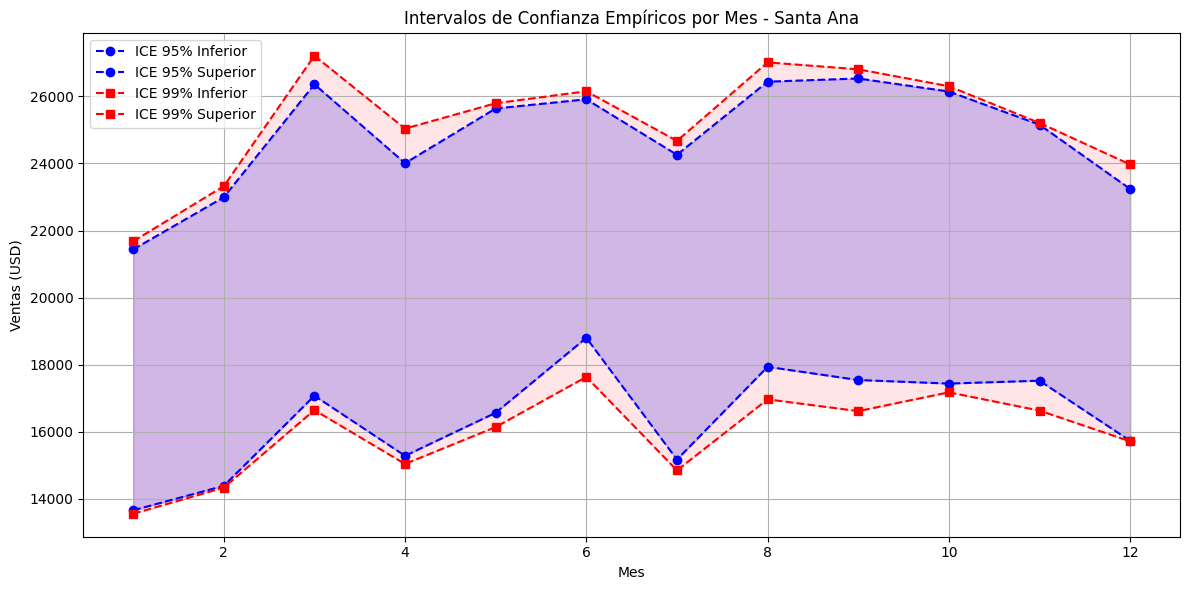

In [138]:
graficar_ice(ice_santa_ana, 'Santa Ana')

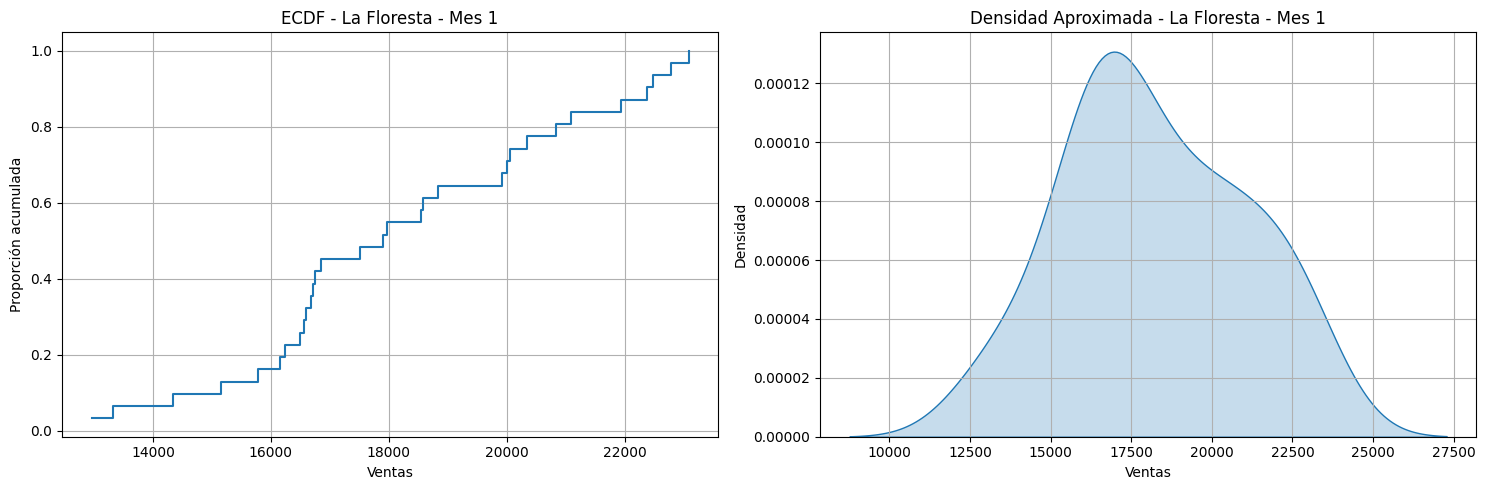

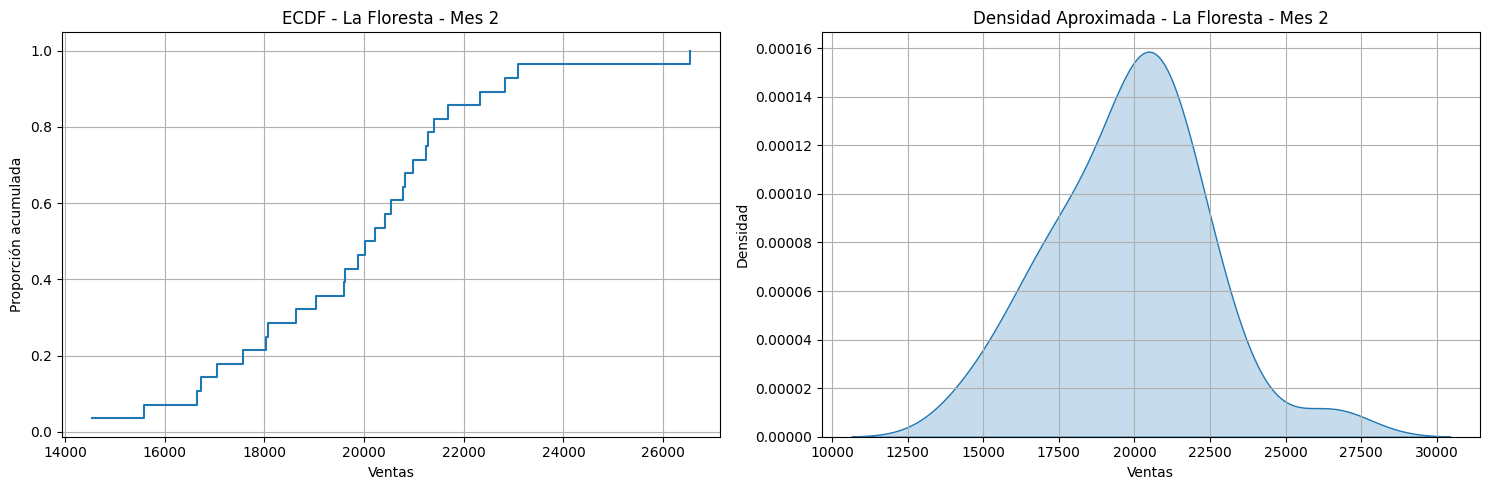

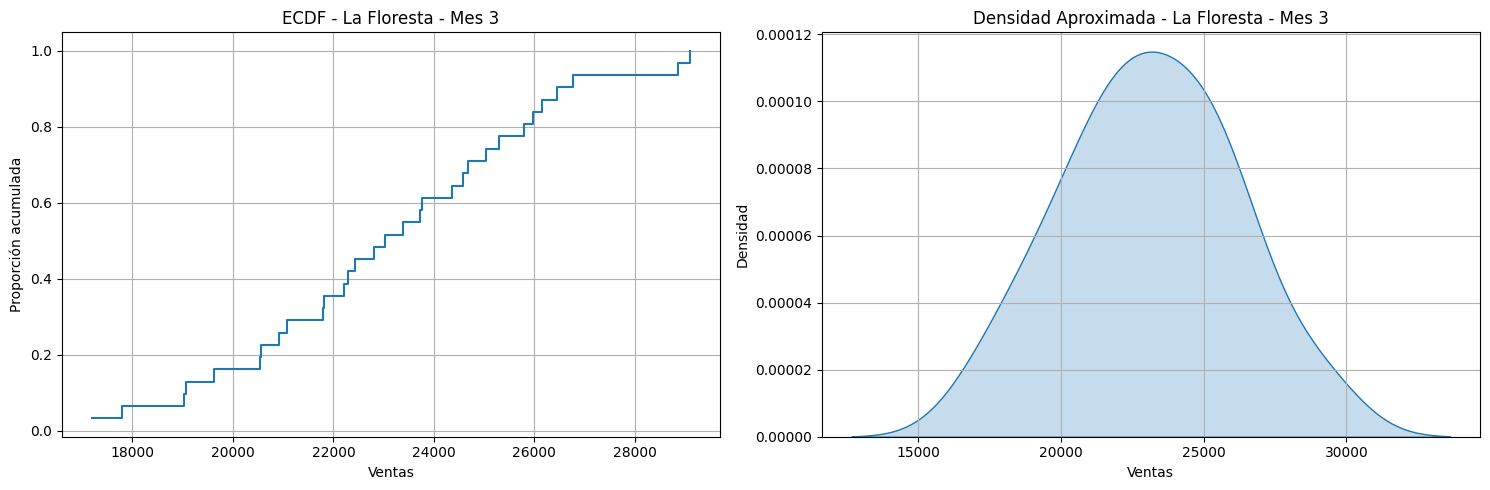

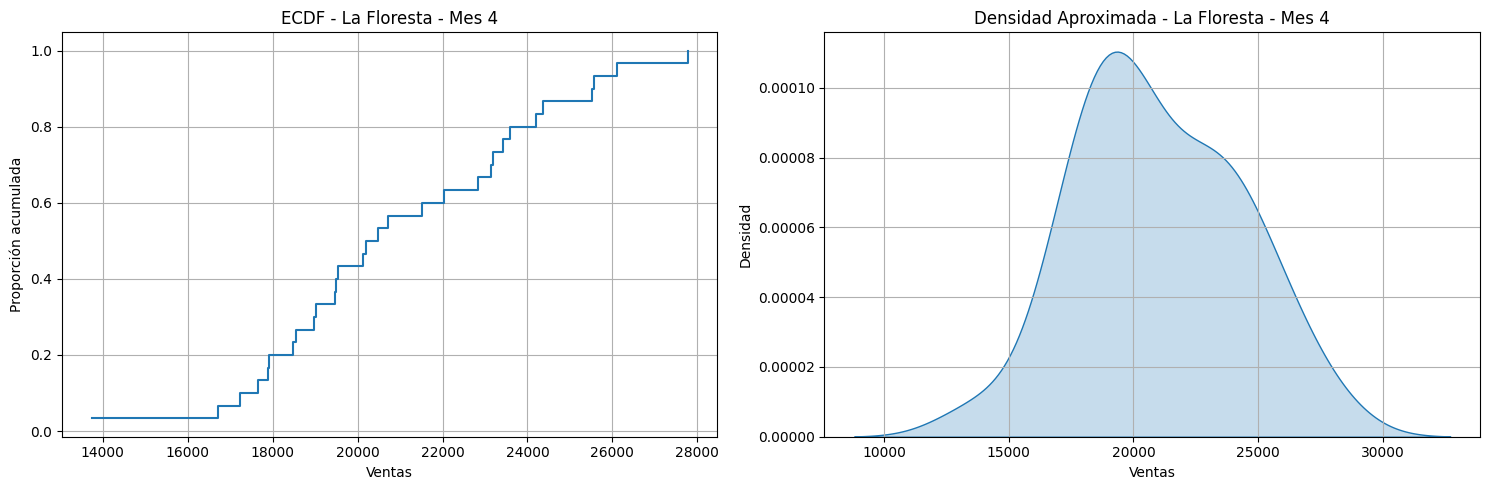

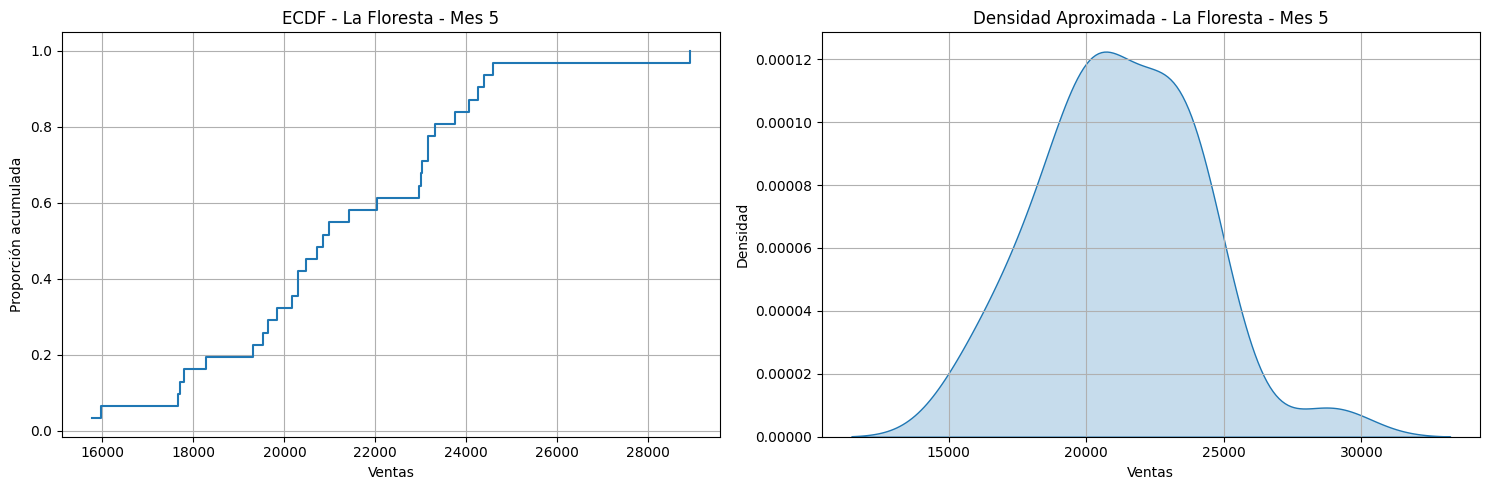

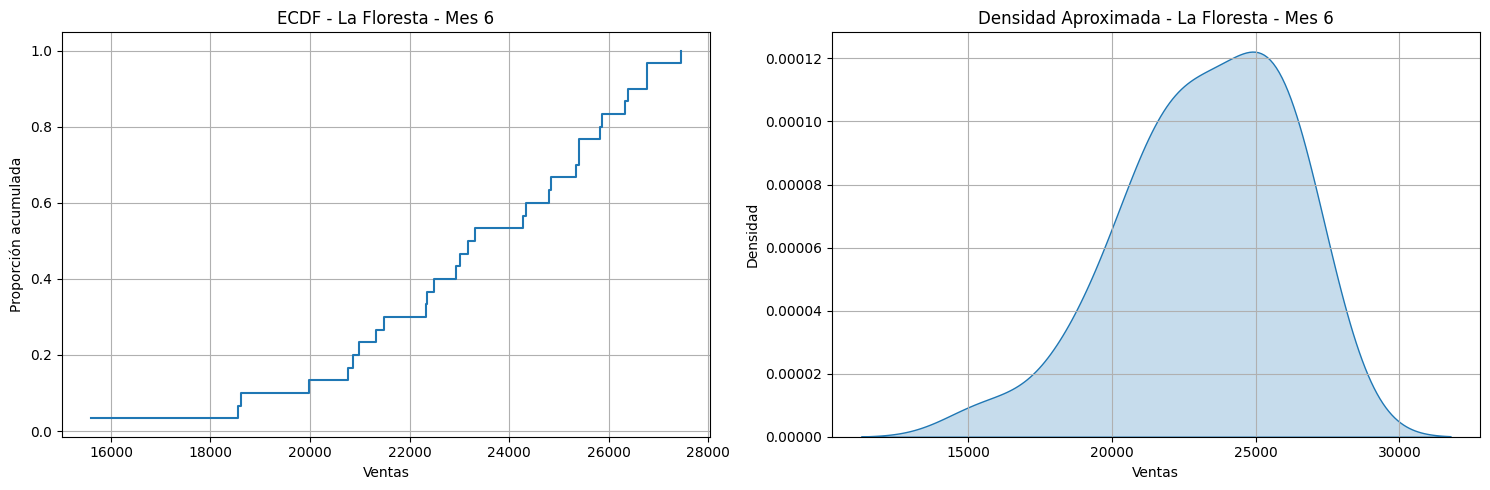

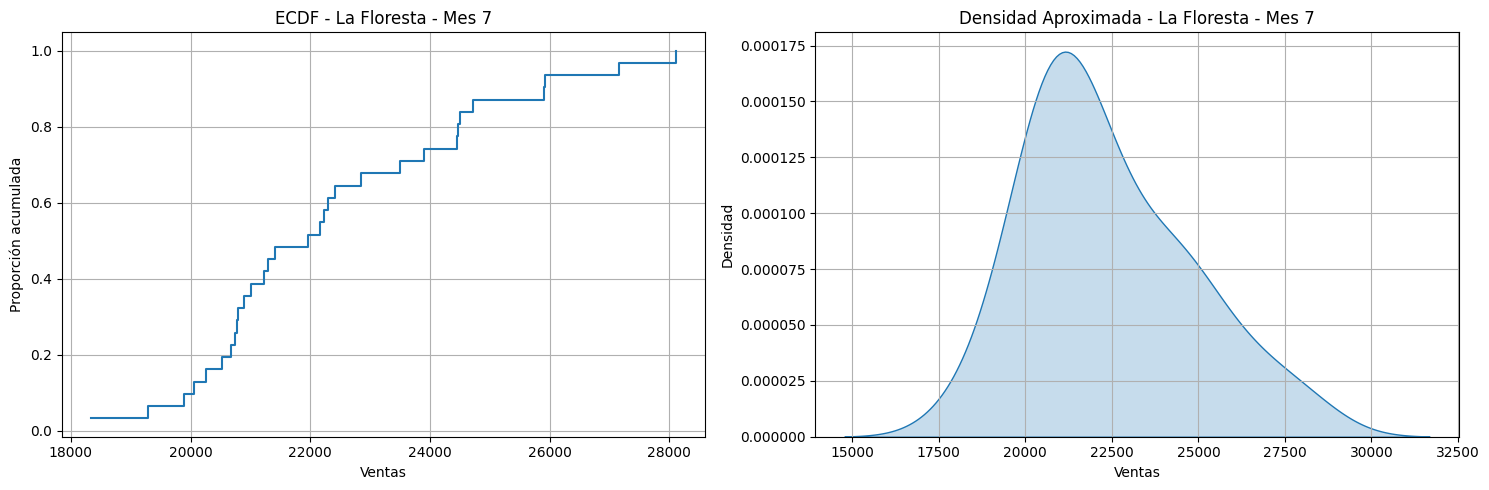

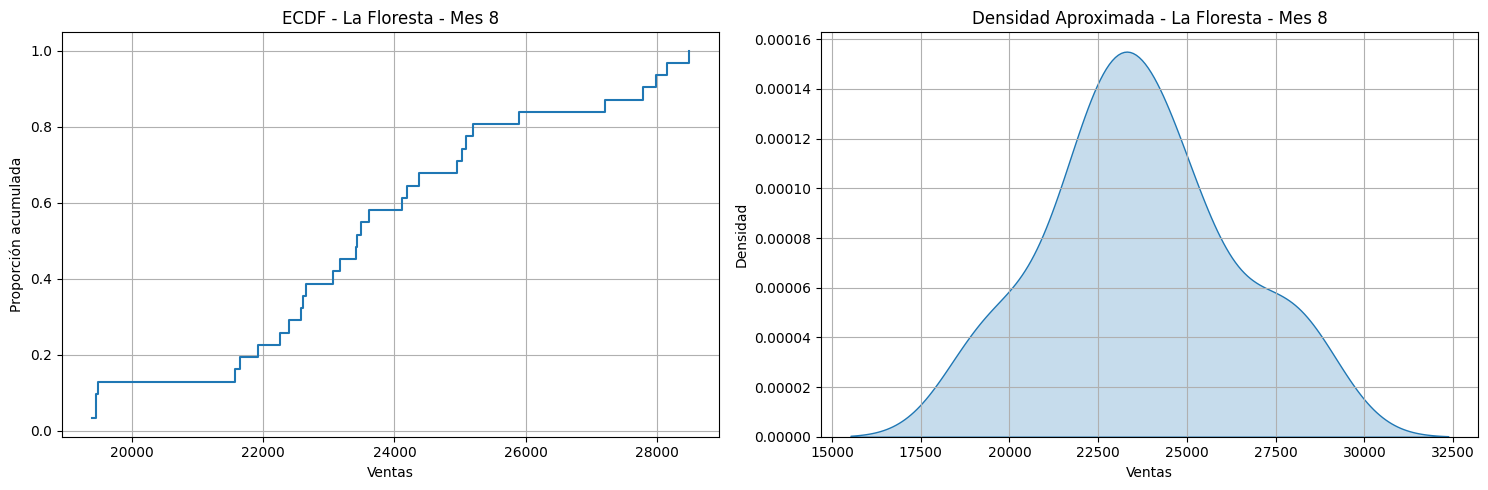

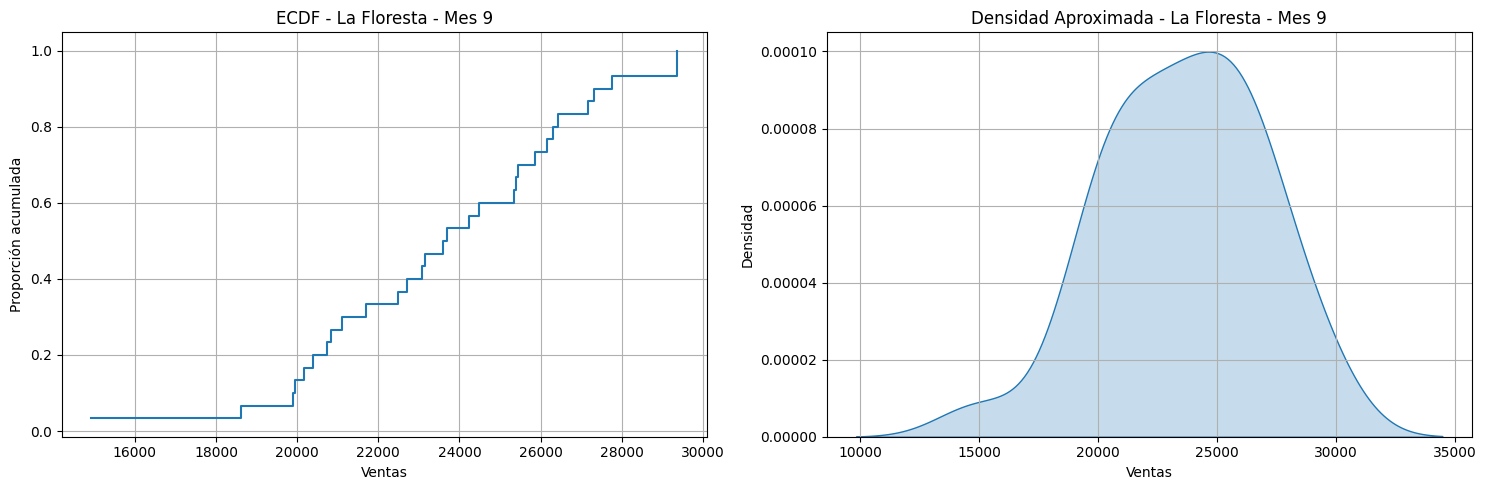

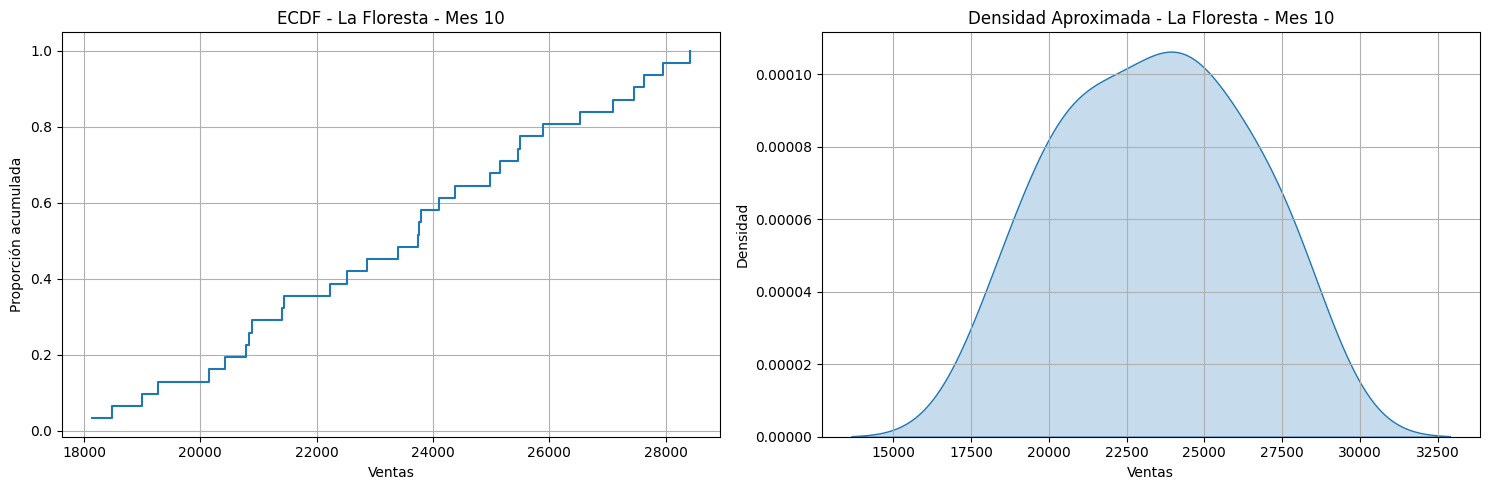

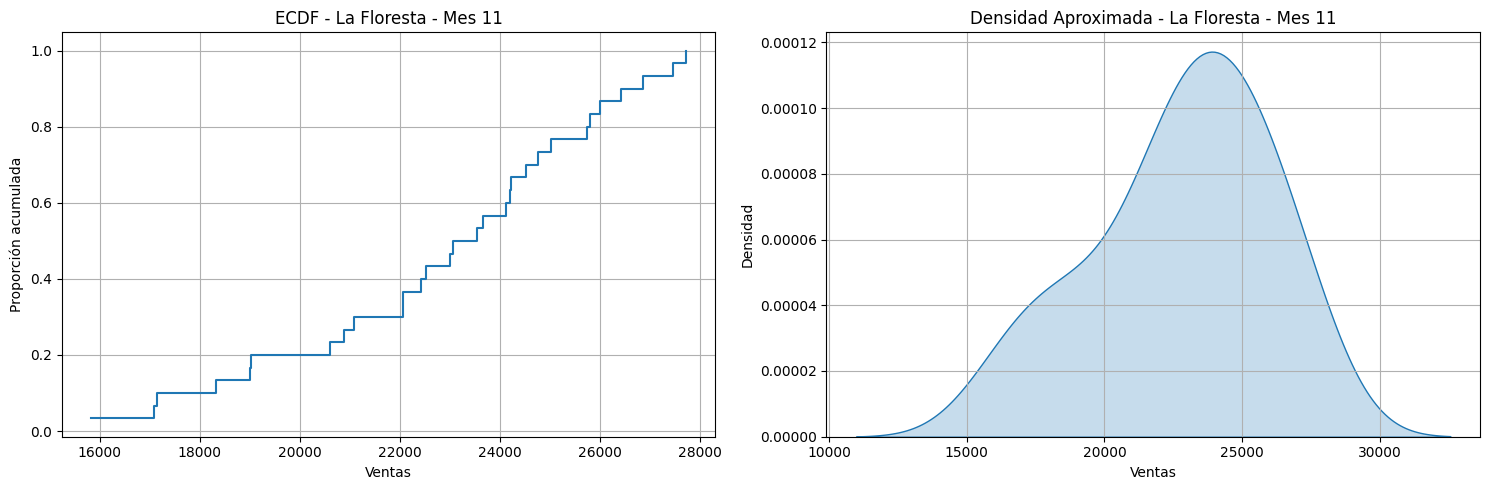

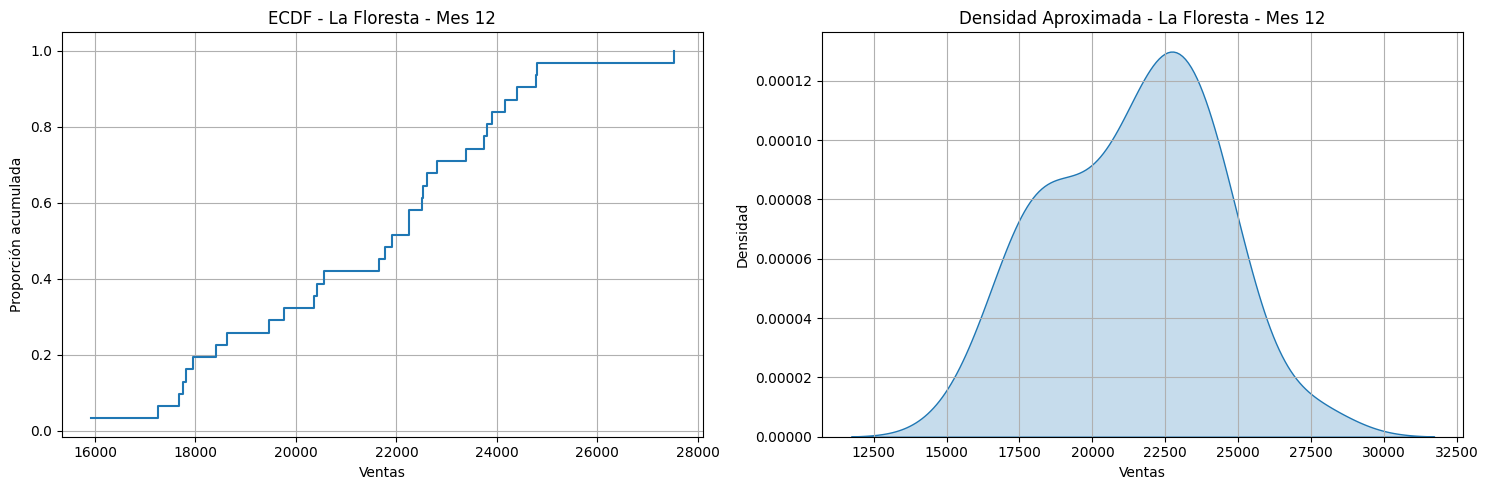

In [139]:
meses_floresta = sorted(df_la_floresta['Mes'].unique())

for mes in meses_floresta:
    datos = df_la_floresta[df_la_floresta['Mes'] == mes]['Ventas']
    x = np.sort(datos)
    y = np.arange(1, len(x)+1) / len(x)
    
    # ECDF
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.step(x, y, where='post')
    plt.title(f'ECDF - La Floresta - Mes {mes}')
    plt.xlabel('Ventas')
    plt.ylabel('Proporción acumulada')
    plt.grid(True)
    
    # Aproximación de Densidad
    plt.subplot(1, 2, 2)
    sns.kdeplot(datos, fill=True)
    plt.title(f'Densidad Aproximada - La Floresta - Mes {mes}')
    plt.xlabel('Ventas')
    plt.ylabel('Densidad')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

In [140]:
ice_la_floresta = calcular_ice_por_mes(df, 'La Floresta')

ice_la_floresta.head(12)

,Mes,ICE 95% Inferior,ICE 95% Superior,ICE 99% Inferior,ICE 99% Superior
0,1,13227.60,22859.55,13013.73,23040.98
1,2,15239.71,24207.15,14678.13,26077.53
2,3,17635.21,28916.44,17277.77,29066.92
3,4,15886.88,26571.25,14164.86,27529.24
4,5,15915.23,25672.00,15794.70,28272.90
5,6,17745.28,26957.79,16031.92,27351.65
6,7,19054.81,27398.49,18480.73,27970.26
7,8,19433.27,28240.12,19392.64,28447.22
8,9,17596.44,29358.67,15457.50,29366.90
9,10,18396.02,28070.31,18185.58,28353.35


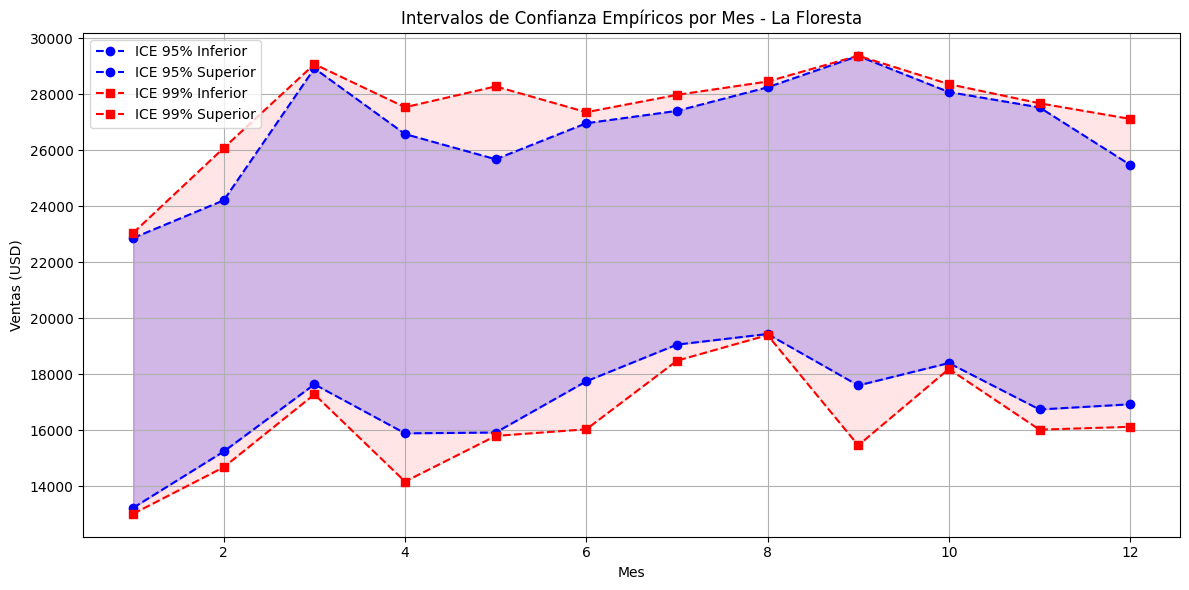

In [141]:
graficar_ice(ice_la_floresta, 'La Floresta')

Ambas tiendas muestran comportamientos estacionales similares en términos generales, pero con diferencias importantes en la distribución y variabilidad de sus ventas:

**Distribución de Ventas (KDE y ECDF)**
- La Floresta tiende a tener KDE con mayor concentración y picos más definidos en varios meses, lo que sugiere mayor estabilidad en los niveles de ventas diarios.
- Santa Ana, en cambio, presenta distribuciones más anchas en algunos meses (marzo, agosto), indicando mayor dispersión de los montos diarios y, por tanto, una mayor incertidumbre operativa en ciertos períodos.
- La función ECDF de La Floresta en muchos meses crece más rápido, lo que también refuerza la percepción de ventas más consistentes.

**Niveles de Venta e Intervalos de Confianza (ICE)**
- A nivel mensual, los ICE de La Floresta tienden a ubicarse en un rango ligeramente más alto que los de Santa Ana, reflejando ventas medianamente superiores.
- No obstante, Santa Ana presenta algunos meses con máximos comparables o incluso mayores (como agosto), pero acompañados de una mayor variabilidad (intervalos más amplios).
- En términos de confiabilidad operativa, La Floresta ofrece rangos más acotados en muchos meses, lo cual puede facilitar la planificación.


**Coclusión General**
- La Floresta muestra un patrón de ventas más estable y menos disperso, lo cual es ventajoso para la previsión de stock, personal e inversiones.
- Santa Ana tiene más variabilidad intermensual, con meses de alta actividad pero también mayor incertidumbre, lo que podría indicar oportunidades de mejora en gestión o promoción.

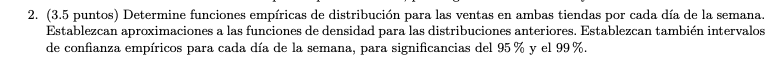

In [142]:
df_santa_ana['DiaSemana'] = df_santa_ana['Fecha'].dt.day_name()
df_la_floresta['DiaSemana'] = df_la_floresta['Fecha'].dt.day_name()

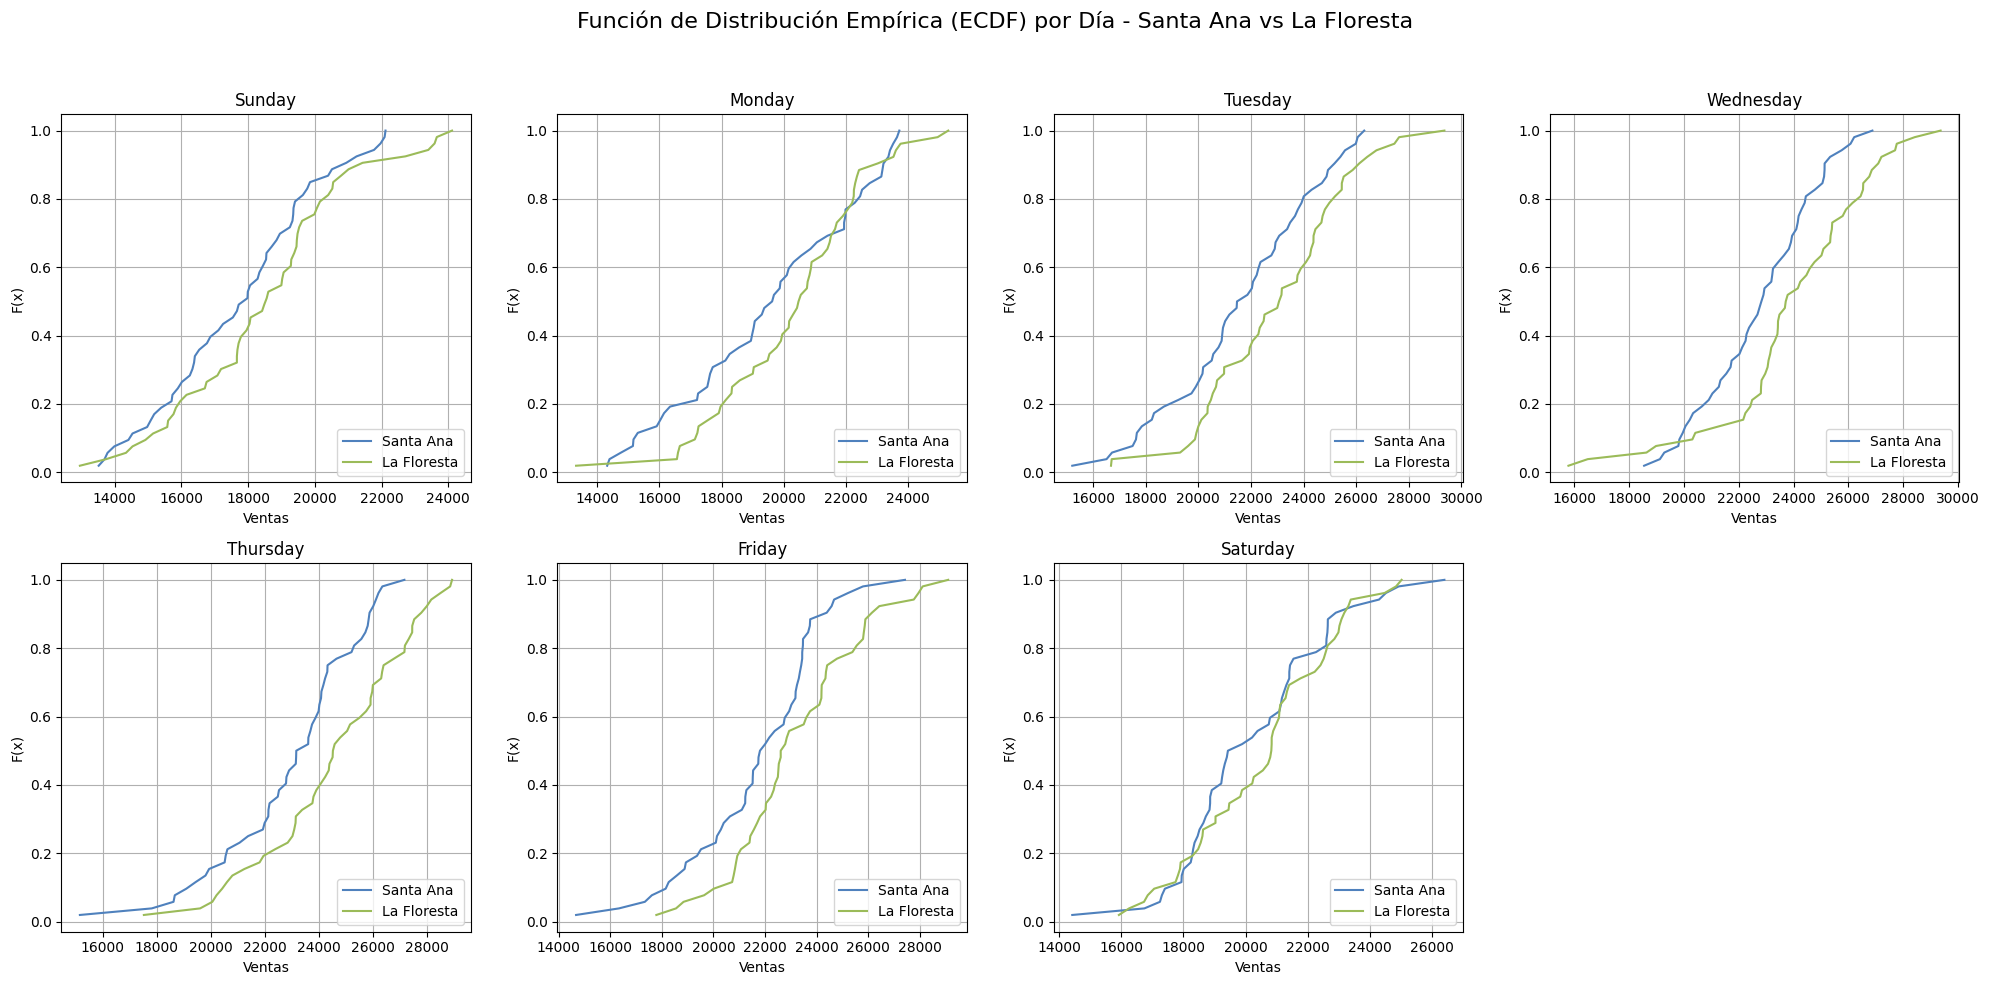

In [143]:
dias = df_santa_ana['DiaSemana'].unique()

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle("Función de Distribución Empírica (ECDF) por Día - Santa Ana vs La Floresta", fontsize=16)

for i, dia in enumerate(dias):
    row, col = divmod(i, 4)
    ax = axs[row, col]

    ventas_sa = df_santa_ana[df_santa_ana['DiaSemana'] == dia]['Ventas']
    ventas_lf = df_la_floresta[df_la_floresta['DiaSemana'] == dia]['Ventas']

    ecdf_sa = ECDF(ventas_sa)
    ecdf_lf = ECDF(ventas_lf)

    ax.plot(ecdf_sa.x, ecdf_sa.y, label='Santa Ana', color=colores[0])
    ax.plot(ecdf_lf.x, ecdf_lf.y, label='La Floresta', color=colores[1])
    ax.set_title(dia)
    ax.set_xlabel("Ventas")
    ax.set_ylabel("F(x)")
    ax.legend(loc='lower right')
    ax.grid(True)

# Eliminar subplot vacío si hay menos de 8
if len(dias) < 8:
    axs[1, 3].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


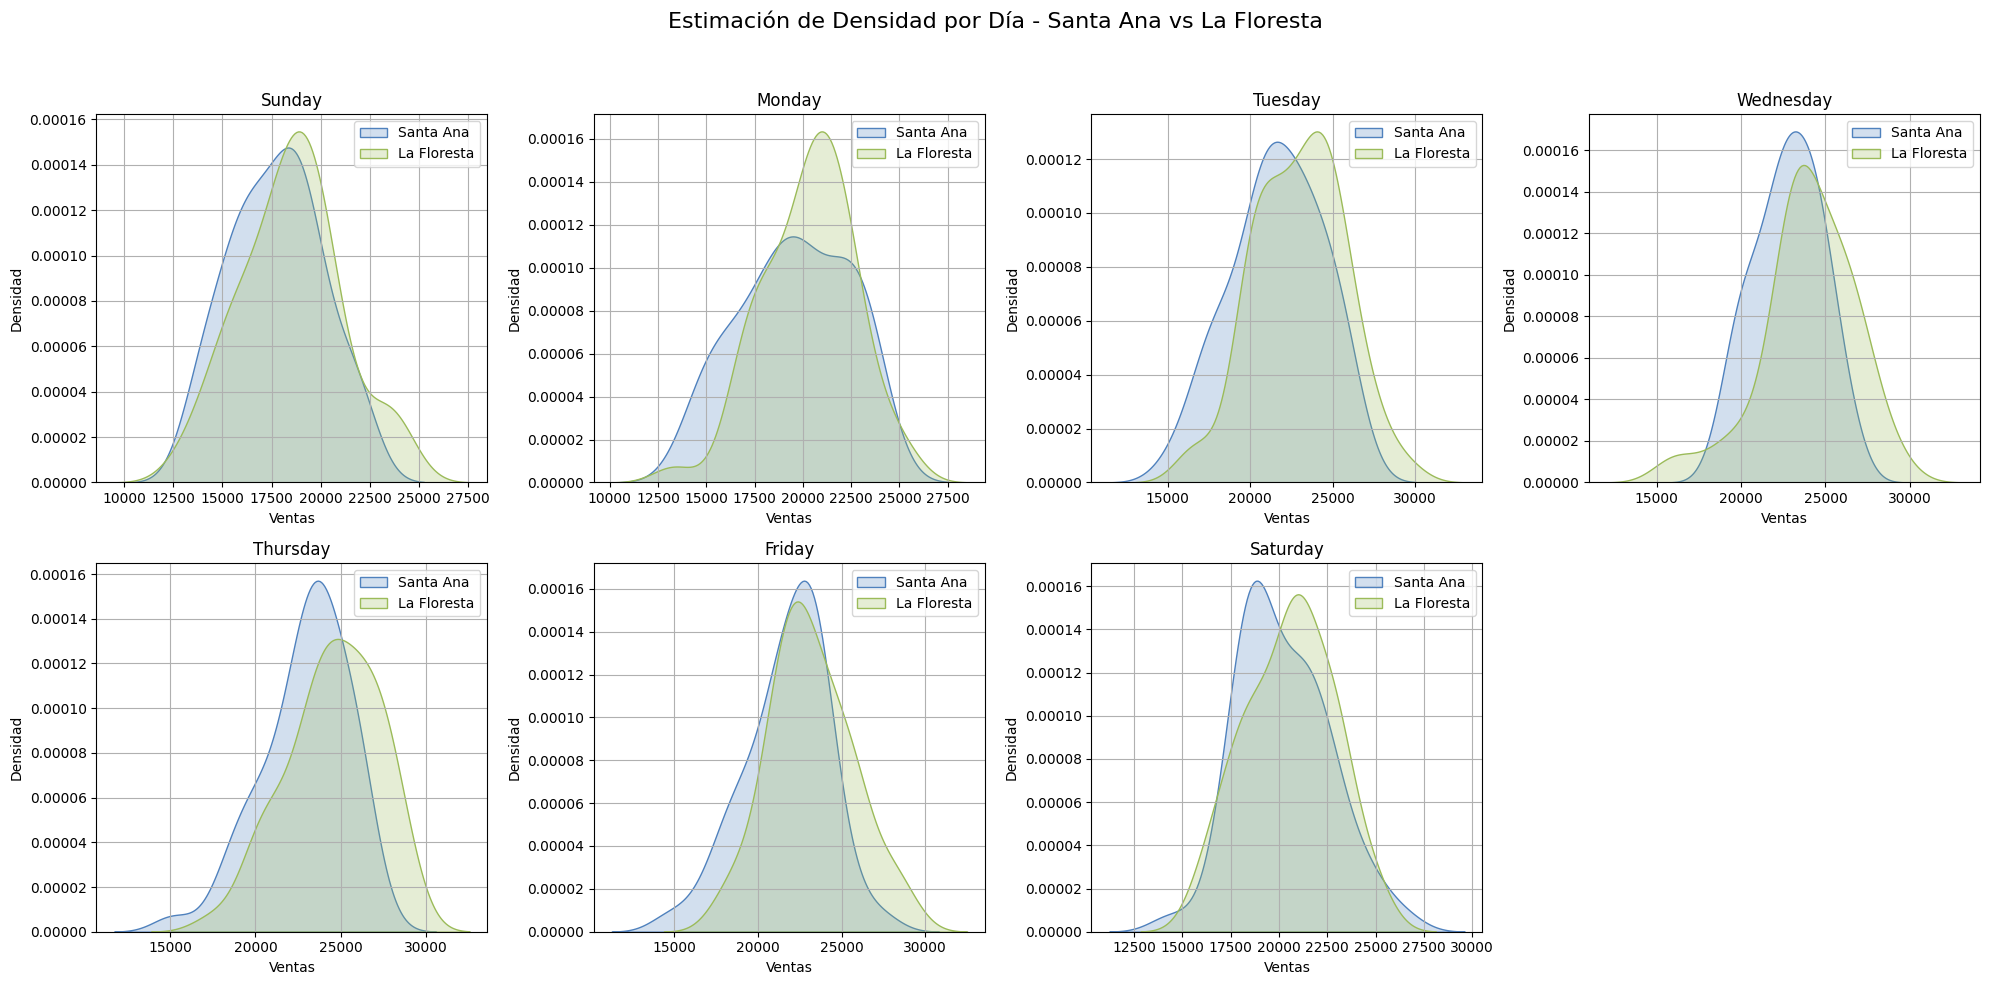

In [144]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle("Estimación de Densidad por Día - Santa Ana vs La Floresta", fontsize=16)

for i, dia in enumerate(dias):
    row, col = divmod(i, 4)
    ax = axs[row, col]

    sns.kdeplot(
        data=df_santa_ana[df_santa_ana['DiaSemana'] == dia],
        x='Ventas', label='Santa Ana', fill=True, ax=ax, color=colores[0]
    )
    sns.kdeplot(
        data=df_la_floresta[df_la_floresta['DiaSemana'] == dia],
        x='Ventas', label='La Floresta', fill=True, ax=ax, color=colores[1]
    )

    ax.set_title(dia)
    ax.set_xlabel('Ventas')
    ax.set_ylabel('Densidad')
    ax.grid(True)
    ax.legend(loc='upper right')

# Eliminar subplot vacío si hay menos de 8
if len(dias) < 8:
    axs[1, 3].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [145]:
def calcular_ice_por_dia(df, tienda, niveles=[0.95, 0.99]):
    df_tienda = df[df['Tienda'] == tienda]
    dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    filas = []

    for dia in dias:
        datos = df_tienda[df_tienda['DiaSemana'] == dia]['Ventas'].values
        fila = {'DiaSemana': dia}
        for nivel in niveles:
            alpha = 1 - nivel
            low = np.percentile(datos, alpha/2 * 100)
            high = np.percentile(datos, (1 - alpha/2) * 100)
            fila[f'ICE {int(nivel*100)}% Inferior'] = round(low, 2)
            fila[f'ICE {int(nivel*100)}% Superior'] = round(high, 2)
        filas.append(fila)

    return pd.DataFrame(filas)

In [146]:
ice_dia_santa_ana = calcular_ice_por_dia(df_santa_ana, 'Santa Ana')

ice_dia_santa_ana.head(7)

,DiaSemana,ICE 95% Inferior,ICE 95% Superior,ICE 99% Inferior,ICE 99% Superior
0,Monday,14494.35,23611.21,14336.58,23700.54
1,Tuesday,16570.24,26037.80,15542.00,26242.67
2,Wednesday,19166.11,26177.96,18692.64,26709.62
3,Thursday,18031.07,26304.82,15828.22,26952.30
4,Friday,16613.64,25640.80,15098.67,27012.49
5,Saturday,16878.94,24819.74,15009.46,26030.36
6,Sunday,13724.81,22053.26,13568.38,22109.97


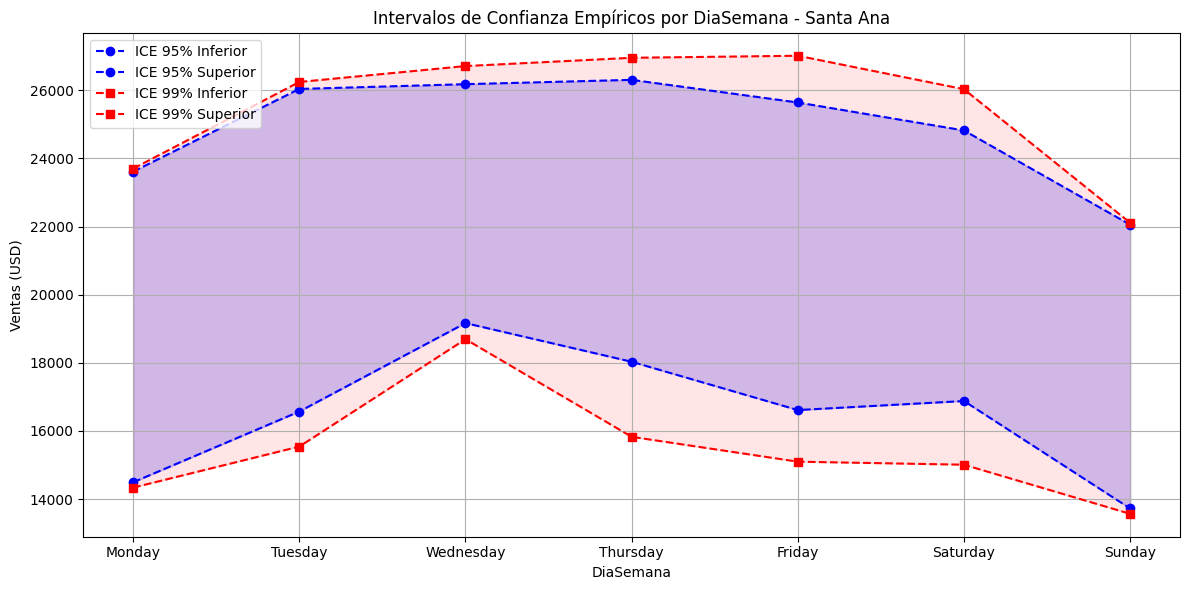

In [147]:
graficar_ice(ice_dia_santa_ana, 'Santa Ana', t = 'DiaSemana')

In [148]:
ice_dia_la_floresta = calcular_ice_por_dia(df_la_floresta, 'La Floresta')

ice_dia_la_floresta.head(7)

,DiaSemana,ICE 95% Inferior,ICE 95% Superior,ICE 99% Inferior,ICE 99% Superior
0,Monday,16571.88,24623.79,14144.33,25206.29
1,Tuesday,17423.85,27583.32,16689.11,28915.67
2,Wednesday,17077.48,28243.88,15963.21,29128.02
3,Thursday,19724.03,28756.19,18048.85,28905.43
4,Friday,18630.52,28068.97,17981.57,28851.75
5,Saturday,16379.89,24746.19,16002.89,24980.42
6,Sunday,13916.48,23634.24,13161.52,23991.89


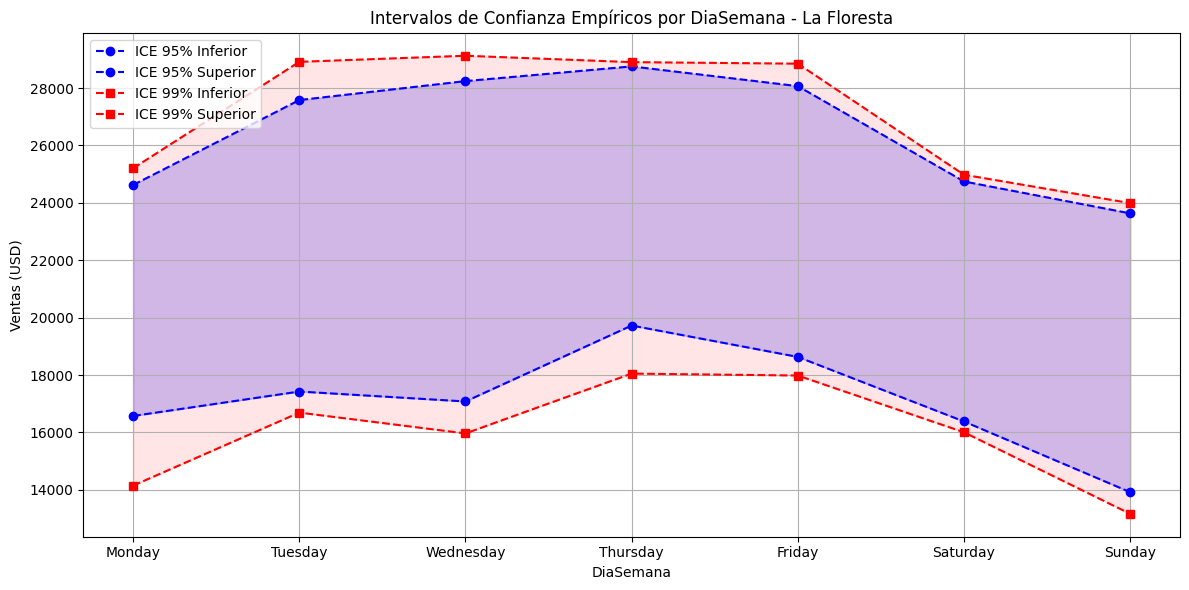

In [149]:
graficar_ice(ice_dia_la_floresta, 'La Floresta', t = 'DiaSemana')

**Análisis de Distribuciones Empíricas (ECDF)**

El análisis de las funciones empíricas de distribución revela patrones claros en el comportamiento semanal de las ventas para ambas tiendas:
- **Domingo** muestra ventas sistemáticamente más bajas en ambas tiendas, con curvas ECDF muy empinadas y cercanas al origen, lo que indica menor variabilidad y un nivel bajo de ventas.
- **Jueves y viernes** presentan curvas ECDF más desplazadas hacia la derecha, reflejando mayores ventas acumuladas, especialmente en Santa Ana.
- En **miércoles y jueves**, Santa Ana muestra mayor dispersión en su ECDF, mientras que La Floresta mantiene una forma más constante, indicando una estructura de ventas más estable.

**Análisis de Densidad Estimada (KDE)**

- **Santa Ana** presenta picos de densidad más amplios y planos en algunos días (como lunes o miércoles), lo que sugiere mayor variabilidad diaria.
- **La Floresta**, en cambio, muestra curvas KDE más estrechas y definidas durante la semana, especialmente de martes a jueves, lo cual refuerza la percepción de mayor estabilidad.
- En días como **sábado y domingo**, ambas tiendas presentan curvas más concentradas, lo que indica una rutina más predecible de consumo.

**Intervalos de Confianza Empíricos (ICE)**

- En términos de los intervalos de confianza del 95% y 99%, **La Floresta** tiende a tener ICE más estrechos y ubicados en un rango superior al de Santa Ana durante **martes a viernes**, lo que sugiere no solo mayor volumen de ventas sino también menor dispersión.
- **Santa Ana** muestra ICE más amplios y variables en esos mismos días, lo que indica mayor incertidumbre operativa.
- Los **ICE del domingo** son los más bajos y acotados en ambas tiendas, reafirmando que es el día de menor actividad.

**Conclusiones Final**
- **La Floresta** exhibe un patrón semanal más estable y predecible, con días fuertes en ventas entre semana (martes a viernes), y una variabilidad contenida.
- **Santa Ana** muestra una mayor dispersión diaria, especialmente entre miércoles y viernes, lo que puede reflejar tanto oportunidades de alto volumen como desafíos de gestión.
- En términos operativos, **jueves y viernes** son los días clave para ambas tiendas, mientras que **domingo** es sistemáticamente el día más débil.

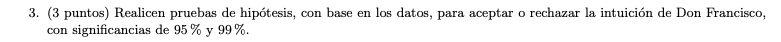

In [150]:
ventas_sa = df_santa_ana['Ventas']
ventas_lf = df_la_floresta['Ventas']

In [151]:
# Cálculo de medias y desviaciones
media_sa = ventas_sa.mean()
std_sa = ventas_sa.std(ddof=1)
media_lf = ventas_lf.mean()
std_lf = ventas_lf.std(ddof=1)

print("📊 Estadísticas generales:")
print(f"Santa Ana - Media: ${media_sa:.2f} | Desviación estándar: ${std_sa:.2f}")
print(f"La Floresta - Media: ${media_lf:.2f} | Desviación estándar: ${std_lf:.2f}")

# Comparación simple
if media_lf < media_sa:
    print("\n✅ La media de ventas de La Floresta es menor que la de Santa Ana.")
    diferencia = media_sa - media_lf
    print(f"La diferencia promedio es de ${diferencia:.2f} por día.")
else:
    print("\n❌ La media de ventas de La Floresta no es menor que la de Santa Ana.")


📊 Estadísticas generales:
Santa Ana - Media: $20927.77 | Desviación estándar: $3013.34
La Floresta - Media: $21990.55 | Desviación estándar: $3274.75

❌ La media de ventas de La Floresta no es menor que la de Santa Ana.


**Demostracion de normalidad para aplicar prueba de hipótesis**

In [152]:
def plot_sfo_traffic_analysis(data, numerical_columns, tienda):

    n = len(numerical_columns)
    fig, axs = plt.subplots(nrows=n, ncols=3, figsize=(15, 5 * n))

    # Si solo hay una fila, convertimos axs en 2D para indexar como axs[i, j]
    if n == 1:
        axs = np.array([axs])

    for i, column in enumerate(numerical_columns):
        # Histograma + KDE
        sns.histplot(data[column], kde=True, bins=30, ax=axs[i, 0])
        axs[i, 0].set_title(f'Histograma + KDE de {column} ({tienda})')
        axs[i, 0].set_xlabel(column)
        axs[i, 0].set_ylabel('Frecuencia')

        # Boxplot
        sns.boxplot(x=data[column], ax=axs[i, 1])
        axs[i, 1].set_title(f'Boxplot de {column} ({tienda})')
        axs[i, 1].set_xlabel(column)

        # Q-Q plot
        sm.qqplot(data[column], line='45', fit=True, ax=axs[i, 2])
        axs[i, 2].set_title(f'Q-Q Plot de {column} ({tienda})')

    plt.tight_layout()
    plt.show()

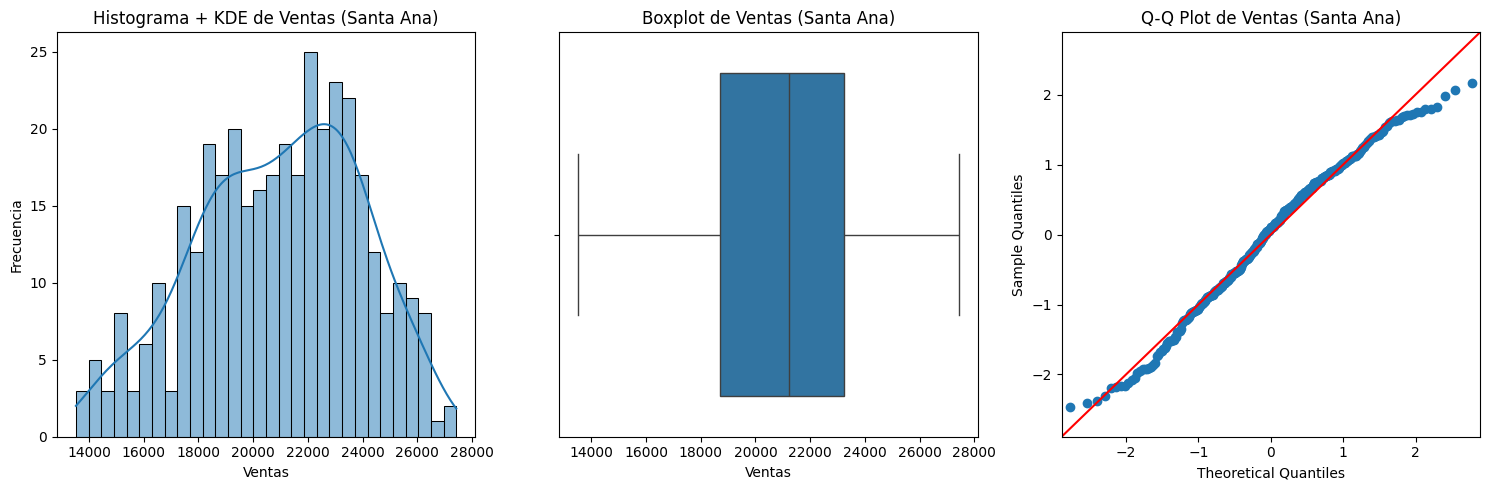

In [153]:
plot_sfo_traffic_analysis(df_santa_ana, ["Ventas"], 'Santa Ana')

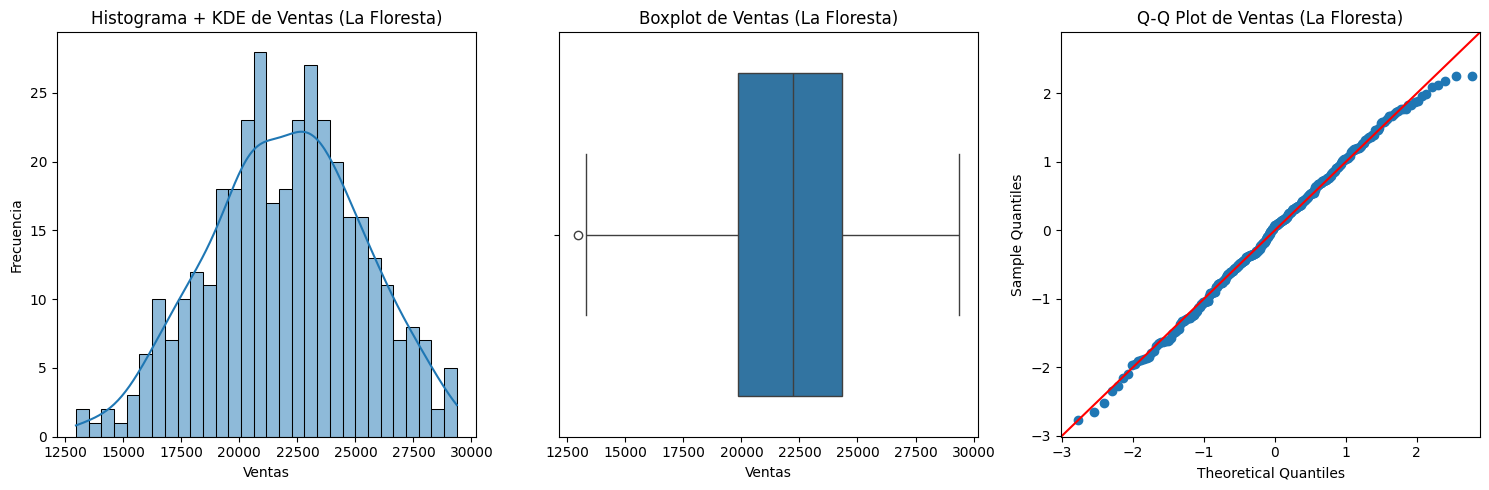

In [154]:
plot_sfo_traffic_analysis(df_la_floresta, ["Ventas"], 'La Floresta')

Queremos evaluar si la tienda **La Floresta** vende más que **Santa Ana**, contrastando sus medias poblacionales.

Denotamos:
- $\mu_A$: media poblacional de Santa Ana  
- $\mu_B$: media poblacional de La Floresta

Las hipótesis se formulan como:

- **Hipótesis nula**: $H_0 : \mu_B \leq \mu_A$  
  (_No hay evidencia suficiente de que La Floresta venda más que Santa Ana._)

- **Hipótesis alternativa**: $H_1 : \mu_B > \mu_A$  
  (_La Floresta vende significativamente más que Santa Ana._)

Este es un **test unilateral de cola derecha**, ya que nos interesa determinar si $\mu_B$ es mayor que $\mu_A$.

Rechazamos $H_0$ si el **valor $p$** es menor que el nivel de significancia $\alpha$ (por ejemplo, $\alpha = 0.05$ o $\alpha = 0.01$).

In [158]:
def comparar_promedios_tiendas(ventas_A, ventas_B, nombre_A='Tienda A', nombre_B='Tienda B', alpha=0.01):
    # Calcular medias
    mean_A = np.mean(ventas_A)
    mean_B = np.mean(ventas_B)

    # Calcular desviaciones estándar muestrales
    std_A = np.std(ventas_A, ddof=1)
    std_B = np.std(ventas_B, ddof=1)

    # Tamaños de muestra
    n_A = len(ventas_A)
    n_B = len(ventas_B)

    # Grados de libertad
    df = n_A + n_B - 2

    # Desviación estándar agrupada
    sp = np.sqrt(((n_A - 1) * std_A**2 + (n_B - 1) * std_B**2) / df)

    # Estadístico t (comparamos si B > A)
    t_stat = (mean_B - mean_A) / (sp * np.sqrt(1/n_A + 1/n_B))

    # Valor crítico y p-valor unilateral
    t_critical = t_dist.ppf(1 - alpha, df)
    p_value = 1 - t_dist.cdf(t_stat, df)  # cola derecha

    # Resultados
    print(f"H0: μ_{nombre_B} ≤ μ_{nombre_A} vs H1: μ_{nombre_B} > μ_{nombre_A}")
    print(f"- Media {nombre_A}: {mean_A:.2f}")
    print(f"- Media {nombre_B}: {mean_B:.2f}")
    print(f"- t-statistic: {t_stat:.4f}")
    print(f"- Grados de libertad: {df}")
    print(f"- Valor crítico (α = {alpha}): {t_critical:.4f}")
    print(f"- p-valor (unilateral): {p_value:.6f}")

    if p_value < alpha:
        print(f"\n✅ Rechazamos la hipótesis nula: {nombre_B} vende significativamente más que {nombre_A}.")
    else:
        print(f"\n❌ No se rechaza la hipótesis nula: No hay evidencia suficiente para afirmar que {nombre_B} vende más que {nombre_A}.")

In [159]:
comparar_promedios_tiendas(
    ventas_A=df_santa_ana['Ventas'],
    ventas_B=df_la_floresta['Ventas'],
    nombre_A='Santa Ana',
    nombre_B='La Floresta',
    alpha=0.01  # para 99% de confianza
)

H0: μ_La Floresta ≤ μ_Santa Ana vs H1: μ_La Floresta > μ_Santa Ana
- Media Santa Ana: 20927.77
- Media La Floresta: 21990.55
- t-statistic: 4.5626
- Grados de libertad: 728
- Valor crítico (α = 0.01): 2.3315
- p-valor (unilateral): 0.000003

✅ Rechazamos la hipótesis nula: La Floresta vende significativamente más que Santa Ana.


In [160]:
comparar_promedios_tiendas(
    ventas_A=df_santa_ana['Ventas'],
    ventas_B=df_la_floresta['Ventas'],
    nombre_A='Santa Ana',
    nombre_B='La Floresta',
    alpha=0.05  # para 95% de confianza
)

H0: μ_La Floresta ≤ μ_Santa Ana vs H1: μ_La Floresta > μ_Santa Ana
- Media Santa Ana: 20927.77
- Media La Floresta: 21990.55
- t-statistic: 4.5626
- Grados de libertad: 728
- Valor crítico (α = 0.05): 1.6469
- p-valor (unilateral): 0.000003

✅ Rechazamos la hipótesis nula: La Floresta vende significativamente más que Santa Ana.


Existe **evidencia estadística sólida** para afirmar que la tienda **La Floresta vende significativamente más que Santa Ana** en promedio. Este resultado confirma la percepción inicial de Don Francisco, y puede respaldar decisiones comerciales o de inversión focalizadas en esa sucursal.

### Link al Notebook
Se puede encontrar el trabajo completo en el siguiente link: [Repositorio GitHub](https://github.com/abrilnoguera/TPFinal-PEIA)